First try reconstructing these spectra with an autoencoder.  Just because I already have code in hand for that.

In [1]:
def isNaN(string):
    return string != string

In [2]:
from sklearn.decomposition import PCA

from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import richardsplot
import os

In [3]:
dat = pd.read_csv("../data/ParentSample_DR7props.csv")
dat.head()

Unnamed: 0 A_morph           SDSS_NAME          RA        DEC  REDSHIFT  \
0           0       D  093509.48+481910.2  143.789520  48.319504    0.2238   
1           1       E  152925.98+021646.6  232.358261   2.279618    0.2634   
2           2       E  144414.66+063306.7  221.061111   6.551877    0.2080   
3           3       E  140808.19+430316.5  212.034164  43.054600    0.2581   
4           4       E  172711.80+632242.1  261.799194  63.378372    0.2174   

   PLATE  FIBER    MJD  TARGET_FLAG_TARGET  ...   logL     i_2   I_2a     R  \
0    834    361  52316                7691  ...  22.92  17.026 -22.73  1.07   
1   2954    379  54561                   3  ...  22.47  17.490 -22.61  0.41   
2   1829    464  53494           135273475  ...  22.47  16.552 -23.04  0.29   
3   1467     48  53115                7171  ...  22.99  16.922 -23.14  0.85   
4    352    639  51789                7168  ...  22.97  16.730 -22.95  0.99   

          LD_cm       Lobs   L_1.4GHz  SFR (Msun/yr)  Separation  SHIFT_OIII  
0  3.434469e+27  22.949804  23.453667     167.694491         0.0   -3.055901  
1  4.120027e+27  22.510854  23.024252      62.388456         0.0  -51.169969  
2  3.160119e+27  22.505157  23.005020      59.685944         0.0   36.020326  
3  4.030828e+27  23.028500  23.540693     204.901363         0.0 -137.892285  
4  3.313937e+27  23.002030  23.504149     188.365559         0.0  -56.434730  

[5 rows x 165 columns]

In [15]:
sdss_names = dat["SDSS_NAME"].values
sdss_names

array(['093509.48+481910.2', '152925.98+021646.6', '144414.66+063306.7',
       '140808.19+430316.5', '172711.80+632242.1', '130416.99+020537.0',
       '084313.41+535718.8', '123532.83+410445.1', '100438.82+151057.3',
       '104528.30+293344.7', '104541.76+520235.5', '085828.69+342343.8',
       '114646.02+371511.7', '094427.99+360837.1', '115549.43+502117.2',
       '101325.43+221229.4', '111842.83+310317.4', '142146.16+073908.3',
       '102101.20+190012.3', '115758.72-002220.9', '082205.24+455349.1',
       '142943.07+474726.2', '123341.80+644317.4', '104111.97+282805.0',
       '130843.86+190439.7', '140839.00+630600.5', '132136.86+355553.4',
       '170302.88+191034.0', '095302.64+380145.2', '104041.50+600239.3',
       '112959.40+062952.9', '084755.63+263147.6', '161940.56+254323.0',
       '124551.03+032128.3', '085640.78+105755.8', '120944.81+023212.7',
       '131204.70+064107.5', '124853.89+342429.4', '105416.19+351124.1',
       '132059.41+295728.1', '101000.68+300321.5', 

In [4]:
train = pd.read_csv("../data/trainsample_dr7_zlt0.358.csv")
train.head()

Unnamed: 0              SDSS_NAME        RA        DEC  REDSHIFT  PLATE  \
0          48  b'000102.18-102326.9'  0.259118 -10.390822    0.2943    650   
1          81  b'000149.52-100251.8'  0.456358 -10.047724    0.3578    650   
2         157  b'000410.80-104527.1'  1.045027 -10.757537    0.2397    650   
3         233  b'000557.23+002837.7'  1.488499   0.477143    0.2596    388   
4         235  b'000601.82-052845.0'  1.507606  -5.479184    0.3295   2630   

   FIBER    MJD  
0    166  52143  
1    152  52143  
2     18  52143  
3    385  51793  
4    149  54327

In [5]:
sdss_name_full = train["SDSS_NAME"].values
z_full         = train["REDSHIFT"].values
plate_full     = train["PLATE"].values
mjd_full       = train["MJD"].values
fiber_full     = train["FIBER"].values

In [10]:
import os
from os.path import exists

In [19]:
for i in range(len(sdss_names)):
    if not exists("../data/images/MKM2022/%s.png"%sdss_names[i]):
        print(sdss_names[i])

093653.84+533126.8


In [18]:
exists("../data/images/MKM2022/%s.png"%sdss_names[i])

True

In [8]:
!ls ../data/images/MKM2022

075403.60+481428.0.png 111121.71+482045.9.png 134845.44+451809.5.png
080829.17+440754.1.png 111842.83+310317.4.png 134854.76+430309.1.png
081652.24+425829.4.png 112007.43+423551.3.png 135326.12+362049.4.png
082205.24+455349.1.png 112439.18+420145.0.png 140336.43+174136.1.png
083353.88+422401.8.png 112503.68+251302.3.png 140407.17+213321.6.png
083443.80+382632.8.png 112941.94+512050.5.png 140658.70+144238.3.png
083658.90+442602.2.png 112952.99+221520.0.png 140808.19+430316.5.png
084313.41+535718.8.png 112959.40+062952.9.png 140839.00+630600.5.png
084347.84+203752.4.png 113020.99+022211.5.png 141116.72+194440.0.png
084755.63+263147.6.png 113109.24+263207.8.png 141213.62+643538.9.png
085632.99+595746.8.png 113109.48+311405.4.png 142138.50+152045.9.png
085640.78+105755.8.png 113858.79+450338.5.png 142146.16+073908.3.png
085828.69+342343.8.png 114646.02+371511.7.png 142522.37+080327.1.png
090151.13+103020.4.png 114954.98+044812.8.png 142613.31+195524.6.png
090454.99+511444.5.png 115523.74+1

In [6]:
#Will want to save homogeneous arrays of each QSO's wavelength, flux, and inverse variance
names   = []
spectra = []
wave    = []
ivar    = []
found   = [] #save dataframe indices which have spectra
N = 0

for sdss_name, red, pl, mj, fib in zip(sdss_name_full, z_full, plate_full, mjd_full, fiber_full):
    try:
        hdul_spec = fits.open("../data/spectra/train/zlt0p6_dr7/lite/%04d/spec-%04d-%05d-%04d.fits" % (pl,pl,mj,fib))
    except FileNotFoundError:
        #print("../data/spectra/train/zlt0p6_dr7/lite/%04d/spec-%04d-%05d-%04d.fits NOT FOUND" % (pl,pl,mj,fib))
        continue
        
        
    #Load in data from each FITS file
    sdss_flux   = hdul_spec[1].data["flux"]
    sdss_loglam = hdul_spec[1].data["loglam"]
    sdss_wave   = 10.**(sdss_loglam) / (1+red)  #x-axis: wavelength
    sdss_ivar   = hdul_spec[1].data["ivar"]
    
    #Want the same wavelength range for each array
    wavemask   = ((sdss_wave>=4000) & (sdss_wave<=6750)) #include Halpha
    sdss_flux  = sdss_flux[wavemask]
    #sdss_flux /= np.median(sdss_flux) #normalize spectrum
    sdss_ivar  = sdss_ivar[wavemask]
    sdss_wave  = sdss_wave[wavemask]
    hdul_spec.close()
    
    if len(sdss_flux) >= 2272:
        names.append(sdss_name[:2272])
        spectra.append(sdss_flux[:2272])
        wave.append(sdss_wave[:2272])
        ivar.append(sdss_ivar[:2272])
        found.append(N)

    N+=1
    if N%1000==0: print(N)  
    
spectra = np.array(spectra)
wave    = np.array(wave)
ivar    = np.array(ivar)
found   = np.array(found)

1000
2000
3000


In [7]:
spectra

array([[14.453294 , 15.508008 , 14.963545 , ...,  9.951537 , 10.234952 ,
         8.803699 ],
       [ 7.602832 ,  8.600404 ,  7.465859 , ...,  4.872083 ,  6.242282 ,
         3.2730827],
       [28.543781 , 28.995981 , 30.414198 , ..., 15.39337  , 15.594685 ,
        15.456948 ],
       ...,
       [12.116452 , 12.15206  , 10.742563 , ...,  6.3495073,  6.5535727,
         7.485681 ],
       [13.731469 , 13.248561 , 12.606498 , ..., 12.045297 ,  8.145015 ,
         9.557875 ],
       [13.475461 , 14.51741  , 15.833292 , ...,  8.811812 ,  8.623327 ,
         8.206344 ]], dtype=float32)

---

Now build the autoencoder.  See for example Chapter 17 of Geron, Hands-on Machine Learning w/ Sci-kit Learn and Keras

In [8]:
spectra.shape

(3806, 2272)

In [9]:
norm_coeffs = np.median(spectra, axis=1)[:, np.newaxis]
spectra_norm = spectra / norm_coeffs
wave_norm = wave.copy()

In [12]:
pca_ncomp=5
pca = PCA(n_components=pca_ncomp) # n_components can be optionally set
pca.fit(spectra_norm) 
eigenvalues = pca.transform(spectra_norm) # compute the eigenvalues of X, pca_ncomp eigenvalues for each of the 18k objects
mean = pca.mean_ #Mean spectrum.  Will need to add this back in for reconstructions.
eigenvectors = pca.components_ # pca_ncompXwave matrix of components, multiply each by respective eigenvalues to reconstruct spec.

In [13]:
print(pca.explained_variance_)

[86.49074   32.21946   14.692877   9.521779   3.2209425]


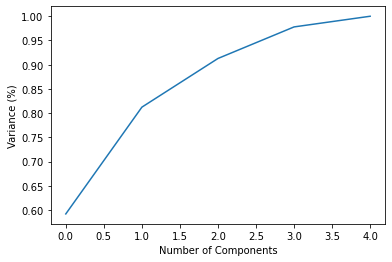

In [14]:
significance = [np.abs(i)/np.sum(pca.explained_variance_) for i in pca.explained_variance_]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

PCA subtracts off mean, so for symmetry with the other algorithms, we'll treat that as the first eigenvector with eigenvector=1.

In [15]:
pca_evecs = np.vstack([pca.mean_,pca.components_]) #Include the mean in the components
#Treat mean as first eigenvector with eigenvalue of 1, so need to prepend 1.0 to each of the eigenvalue arrays
for i,eval in enumerate(eigenvalues):
    new_eval = np.insert(eval,0,1.0,axis=0)
    #print(eval,new_eval)
    if (i==0):
        pca_evals = new_eval
    else: 
        pca_evals = np.vstack([pca_evals,new_eval])

In [16]:
print(eigenvalues.shape,eigenvectors.shape)
print(pca_evals.shape,pca_evecs.shape)

(3806, 5) (5, 2272)
(3806, 6) (6, 2272)


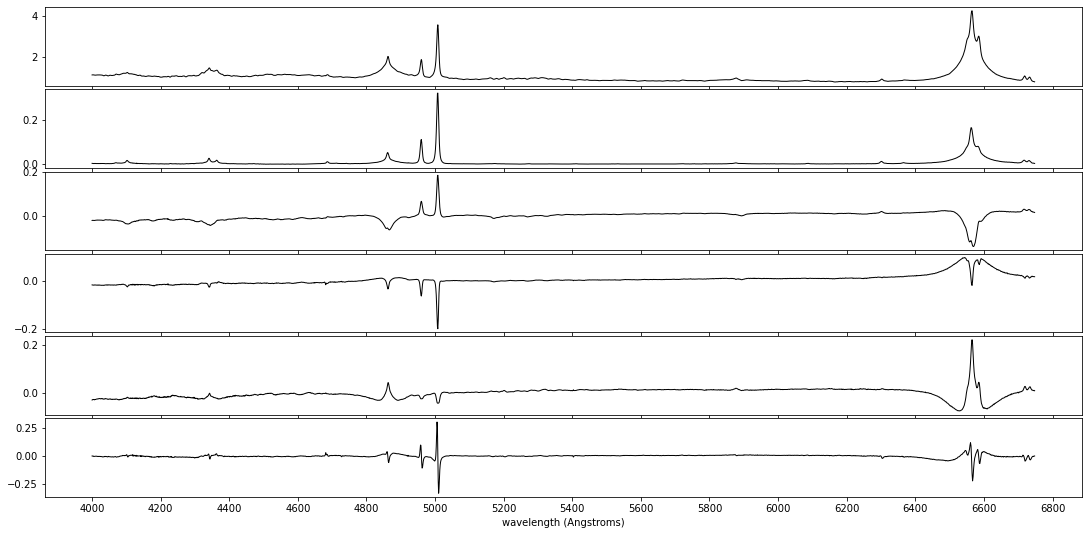

In [19]:
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

title = 'PCA components'

for j in range(len(pca_evecs)):
    
    # plot the components
    ax = fig.add_subplot(len(pca_evecs), 1, j+1)
    #ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(200))
    if j < pca_ncomp - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel('wavelength (Angstroms)')
    ax.plot(wave[0], pca_evecs[j], '-k', lw=1)
    ymin, ymax = ax.get_ylim()
    #ax.plot([1640.42,1640.42],[ymin,ymax],'--k')
    #ax.plot([1663.48,1663.48],[ymin,ymax],'--k')
    #ax.plot([1857.40,1857.40],[ymin,ymax],'--k')
    #ax.plot([1892.03,1892.03],[ymin,ymax],'--k')
    #ax.plot([1908.73,1908.73],[ymin,ymax],'--k')
    #ax.plot([2798.75,2798.75],[ymin,ymax],'--k')
    #ax.set_xlim(1600,3000)
    ax.set_ylim(ymin,ymax)
plt.show()

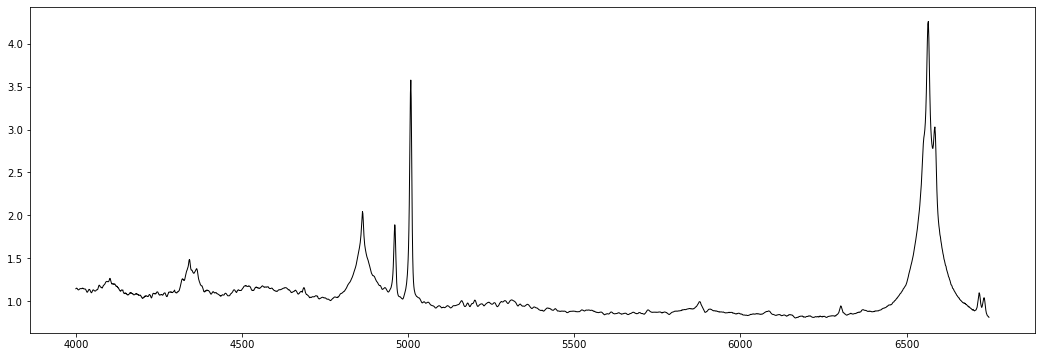

In [21]:
#Plot the mean by itself
mean = pca.mean_ #Equal to spectra.mean(axis=0).
fig = plt.figure(figsize=(18, 6))
plt.plot(wave[0],mean,'-k',lw=1)
#plt.xlim(1600,3000)
plt.show()

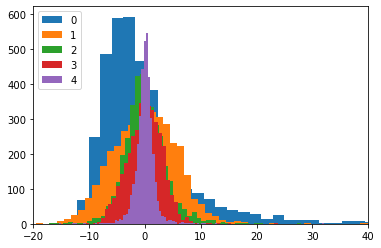

In [24]:
for i,n in enumerate(eigenvalues[0]):
    _ = plt.hist(eigenvalues[:,i],bins='scott',label='{}'.format(i))
plt.xlim(-20,40)
plt.legend(loc=2)
plt.show()

In [33]:
nspec=10
# Pull out a random spectrum
m = np.random.randint(0,nspec-1)
spec_m = spectra_norm[m]  #Could similarly do X[m]
evals_m = pca_evals[m]
print(evals_m)

[ 1.        24.971653  -2.084509   4.1600966 -0.5347917  2.5365157]


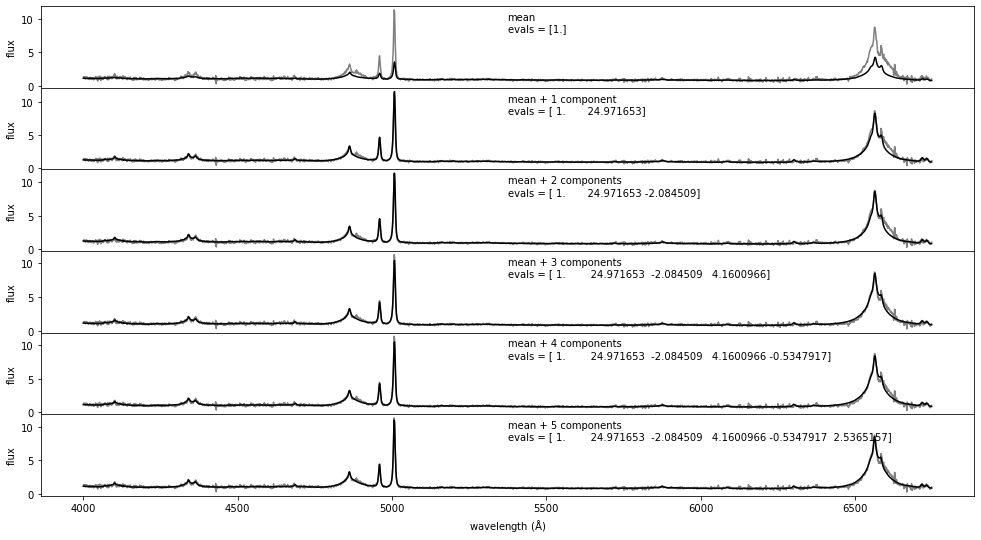

In [34]:
# Plot the sequence of reconstructions for said spectrum
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate(np.arange(pca_ncomp+1)):
    #ax = fig.add_subplot(511 + i)
    ax = fig.add_subplot(pca_ncomp+1, 1, i+1)
    ax.plot(wave[0], spec_m, '-', c='gray')
    ymin, ymax = ax.get_ylim()
    ax.plot(wave[0], np.dot(evals_m[:n+1], pca_evecs[:n+1]), '-k')
    
    if i < pca_ncomp:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    #ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean\n"
        text += "evals = %s" % evals_m[:n+1]
        
    elif n == 1:
        text = "mean + 1 component\n"
        text += "evals = %s" % evals_m[:n+1]

    else:
        text = "mean + %i components\n" % n
        text += "evals = %s" % evals_m[:n+1]

    ax.text(0.5, 0.93, text, ha='left', va='top', transform=ax.transAxes)
    #ax.plot([1640.42,1640.42],[ymin,ymax],'--k')
    #ax.plot([1663.48,1663.48],[ymin,ymax],'--k')
    #ax.plot([1857.40,1857.40],[ymin,ymax],'--k')
    #ax.plot([1892.03,1892.03],[ymin,ymax],'--k')
    #ax.plot([1908.73,1908.73],[ymin,ymax],'--k')
    #ax.plot([2798.75,2798.75],[ymin,ymax],'--k')
    #ax.set_xlim(1600,3000)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

---

Now load in our spectra and reconstruct

In [36]:
dat = pd.read_csv("../data/ParentSample_DR7props.csv")
dat.head()

A_morph           SDSS_NAME          RA        DEC  REDSHIFT  PLATE  FIBER  \
0       D  093509.48+481910.2  143.789520  48.319504    0.2238    834    361   
1       E  152925.98+021646.6  232.358261   2.279618    0.2634   2954    379   
2       E  144414.66+063306.7  221.061111   6.551877    0.2080   1829    464   
3       E  140808.19+430316.5  212.034164  43.054600    0.2581   1467     48   
4       E  172711.80+632242.1  261.799194  63.378372    0.2174    352    639   

     MJD  TARGET_FLAG_TARGET  NSPECOBS  ...    f_c   logL     i_2   I_2a  \
0  52316                7691         1  ...  1.000  22.92  17.026 -22.73   
1  54561                   3         1  ...  1.000  22.47  17.490 -22.61   
2  53494           135273475         1  ...  1.000  22.47  16.552 -23.04   
3  53115                7171         1  ...  1.000  22.99  16.922 -23.14   
4  51789                7168         2  ...  1.000  22.97  16.730 -22.95   

      R         LD_cm       Lobs   L_1.4GHz  SFR (Msun/yr)  Separation  
0  1.07  3.434469e+27  22.949804  23.453667     167.694491         0.0  
1  0.41  4.120027e+27  22.510854  23.024252      62.388456         0.0  
2  0.29  3.160119e+27  22.505157  23.005020      59.685944         0.0  
3  0.85  4.030828e+27  23.028500  23.540693     204.901363         0.0  
4  0.99  3.313937e+27  23.002030  23.504149     188.365559         0.0  

[5 rows x 163 columns]

In [37]:
sdss_name = dat["SDSS_NAME"].values
z         = dat["REDSHIFT"].values
plate     = dat["PLATE"].values
mjd       = dat["MJD"].values
fiber     = dat["FIBER"].values
A_morph = {
    "RL": isNaN(dat["A_morph"].values),
    "U": dat["A_morph"].values=="U",
    "D": dat["A_morph"].values=="D",
    "E": dat["A_morph"].values=="E",
    "M": dat["A_morph"].values=="M",
    "SR":dat["A_morph"].values=="SR",
    "ND":dat["A_morph"].values=="ND"
}

In [38]:
#Will want to save homogeneous arrays of each QSO's wavelength, flux, and inverse variance
names   = []
rqqs = []
wave    = []
ivar    = []
found   = [] #save dataframe indices which have spectra
N = 0

for sdss_name, red, pl, mj, fib in zip(sdss_name, z, plate, mjd, fiber):
    try:
        hdul_spec = fits.open("../data/spectra/kimballsample_full/%04d/spec-%04d-%05d-%04d.fits" % (pl,pl,mj,fib))
    except FileNotFoundError:
        print("../data/spectra/kimballsample_full/%04d/spec-%04d-%05d-%04d.fits NOT FOUND" % (pl,pl,mj,fib))
        continue
        
        
    #Load in data from each FITS file
    sdss_flux   = hdul_spec[1].data["flux"]
    sdss_loglam = hdul_spec[1].data["loglam"]
    sdss_wave   = 10.**(sdss_loglam) / (1+red)  #x-axis: wavelength
    sdss_ivar   = hdul_spec[1].data["ivar"]
    
    #Want the same wavelength range for each array
    wavemask   = ((sdss_wave>=4000) & (sdss_wave<=6750)) #Halpha wavelength range
    sdss_flux  = sdss_flux[wavemask]
    sdss_flux /= np.median(sdss_flux) #normalize spectrum
    sdss_ivar  = sdss_ivar[wavemask]
    sdss_wave  = sdss_wave[wavemask]
    hdul_spec.close()

    if len(sdss_flux) >= 2272:
        names.append(sdss_name[:2272])
        rqqs.append(sdss_flux[:2272])
        wave.append(sdss_wave[:2272])
        ivar.append(sdss_ivar[:2272])
        found.append(N)

    N+=1
    if N%1000==0: print(N)  
    
rqqs = np.array(rqqs)
wave    = np.array(wave)
ivar    = np.array(ivar)
found   = np.array(found)

In [39]:
eigvals_rqqs = pca.transform(rqqs)

In [42]:
eigvals_rqqs

array([[ 3.94675827e+01,  1.44602833e+01, -8.96542549e+00,
        -6.69238472e+00,  3.18642044e+00],
       [ 4.34195817e-01, -5.04882240e+00, -9.41720963e-01,
        -1.34850109e+00, -1.24573338e+00],
       [ 9.05671883e+00, -5.70724821e+00,  4.94362926e+00,
        -3.35084915e+00, -8.04806352e-01],
       [-4.37170744e+00, -6.06533813e+00, -2.11475468e+00,
        -4.53751802e+00, -2.12711453e-01],
       [-6.55377054e+00,  2.98595810e+00, -5.15640688e+00,
        -4.46976948e+00, -1.93737984e+00],
       [-5.90493965e+00, -5.22420883e+00, -6.44614697e+00,
         6.38740063e-02, -1.21652985e+00],
       [ 1.75640430e+01,  1.08474040e+00,  3.07183266e+00,
        -6.69339371e+00, -8.66594195e-01],
       [-1.36948228e+00, -4.32960272e+00,  2.53009129e+00,
         3.59205198e+00, -4.50258702e-01],
       [ 2.47893562e+01, -2.69670534e+00, -5.16538382e+00,
        -6.26491547e-01, -9.97820497e-01],
       [-8.20853996e+00,  8.82210732e-02, -4.29169989e+00,
        -1.78436637e+00

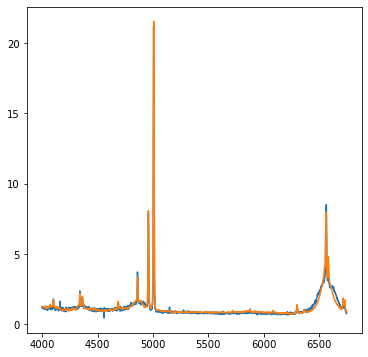

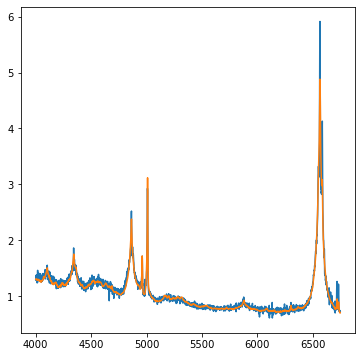

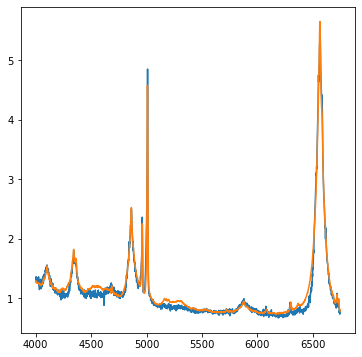

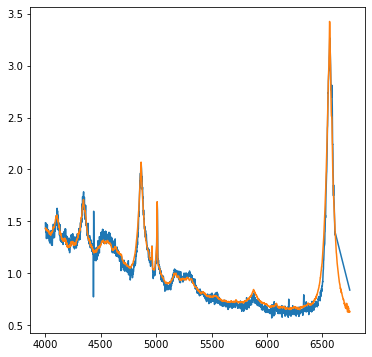

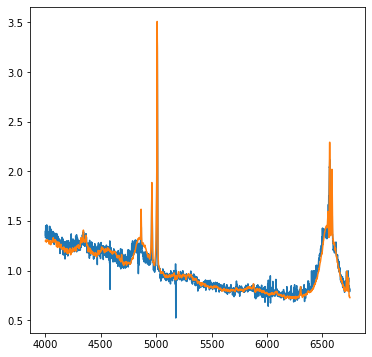

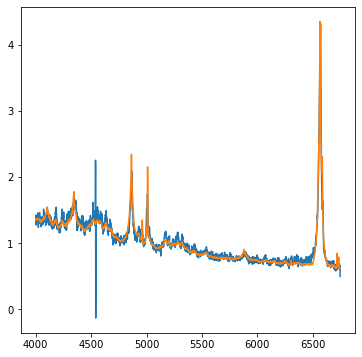

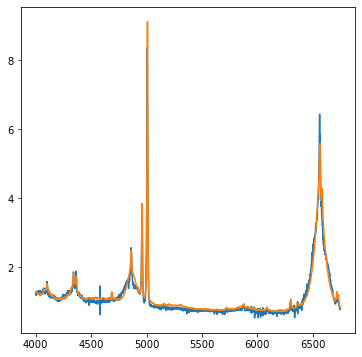

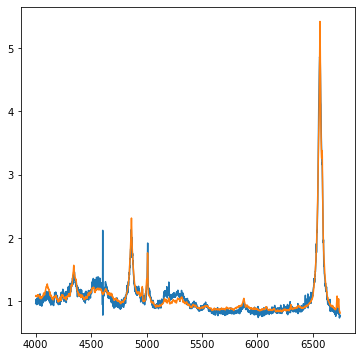

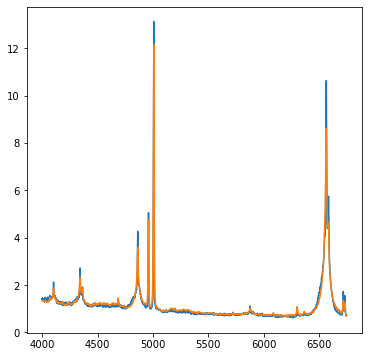

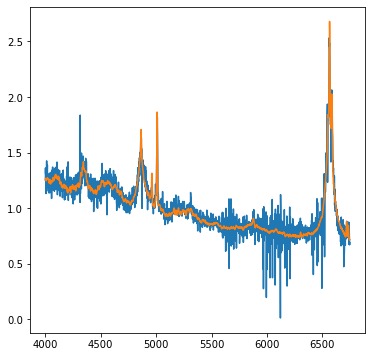

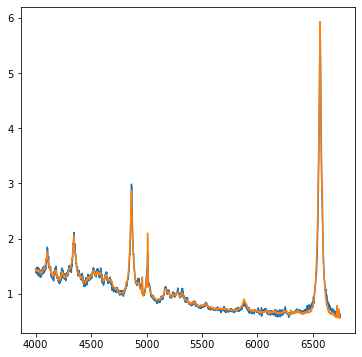

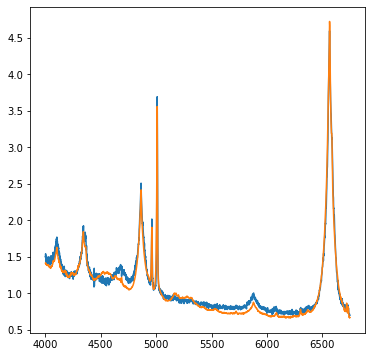

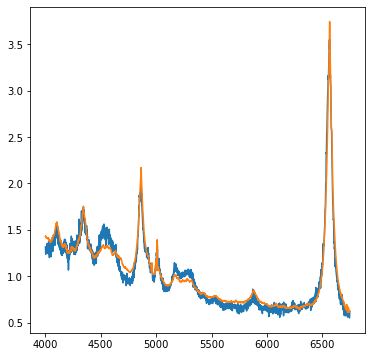

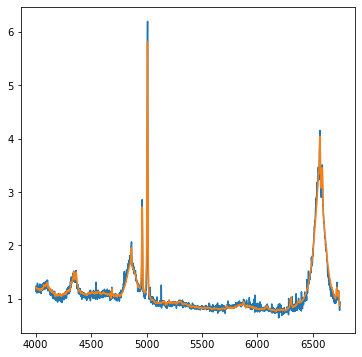

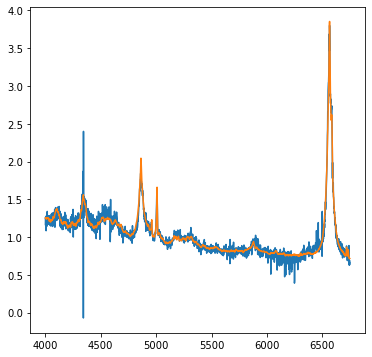

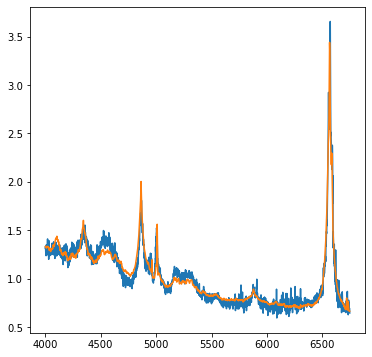

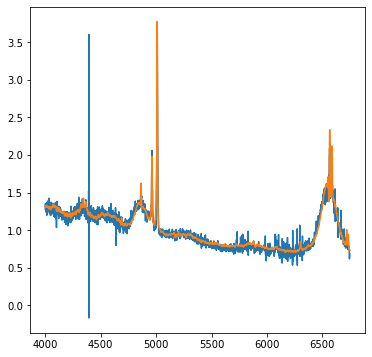

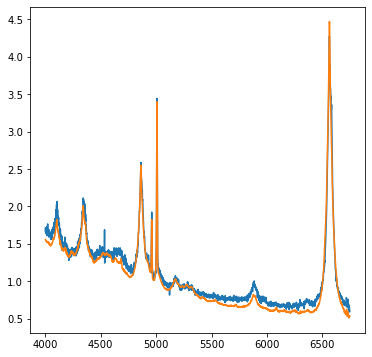

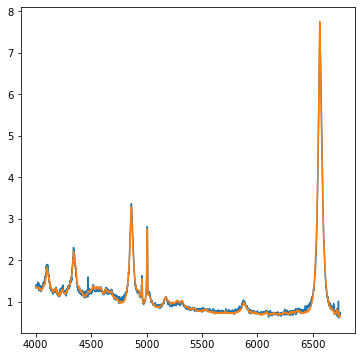

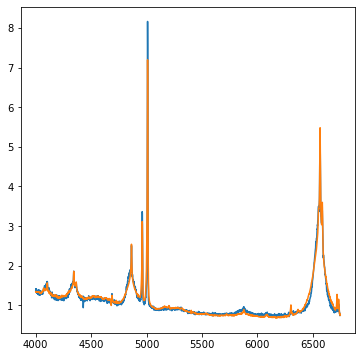

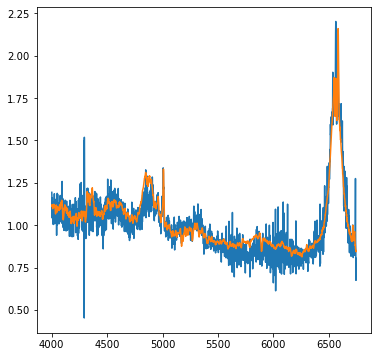

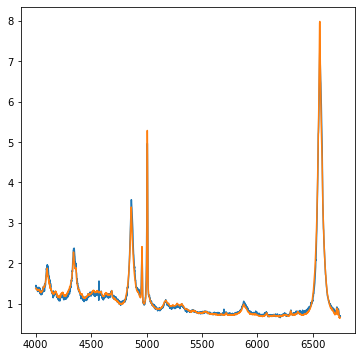

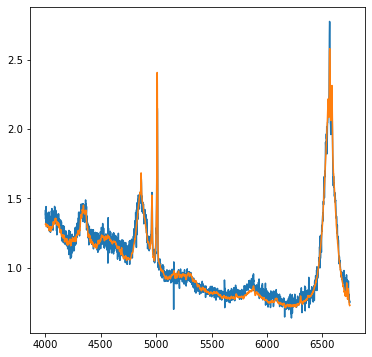

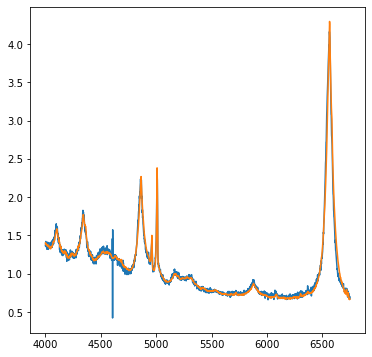

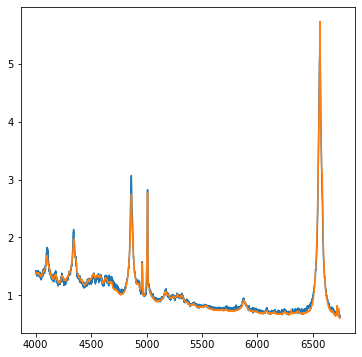

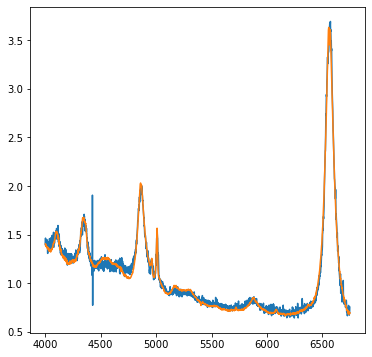

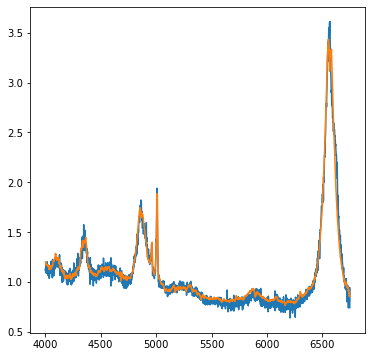

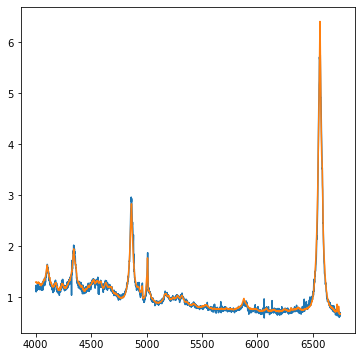

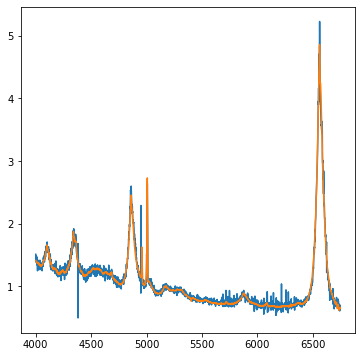

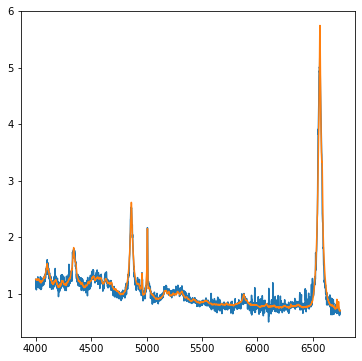

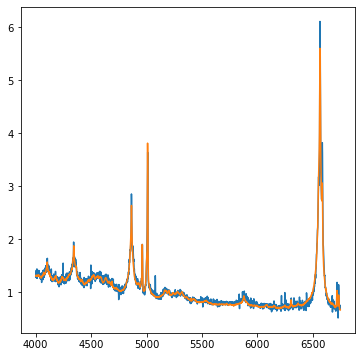

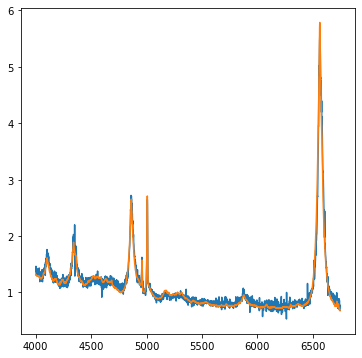

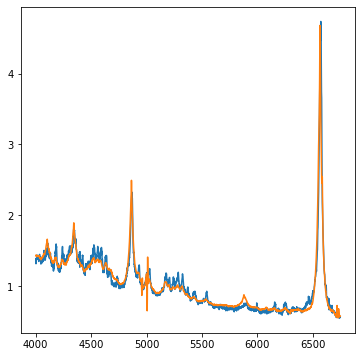

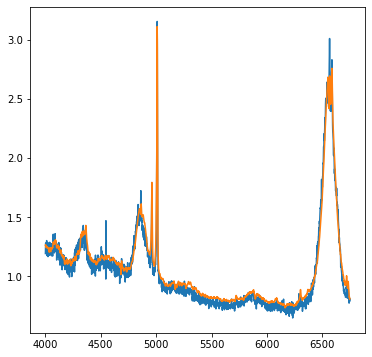

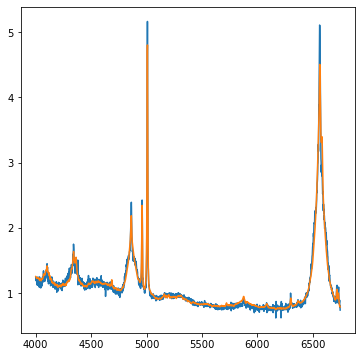

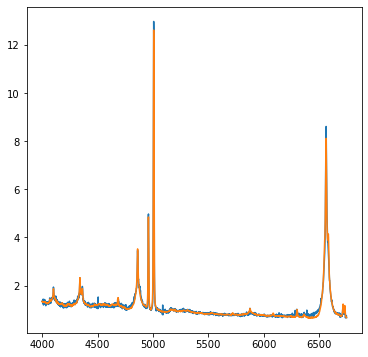

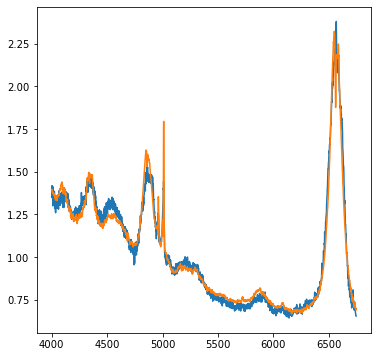

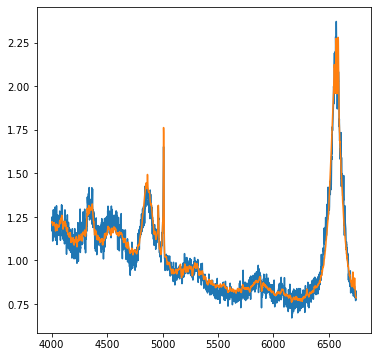

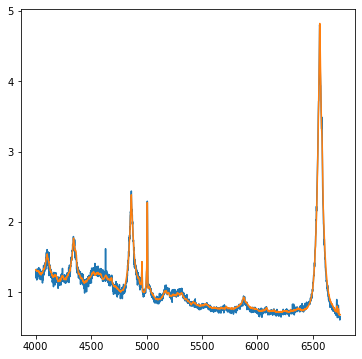

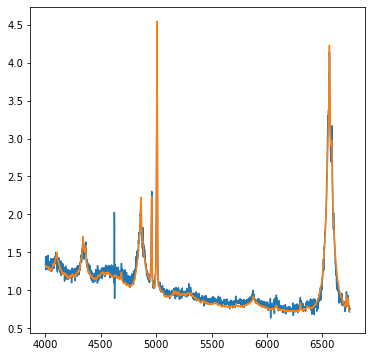

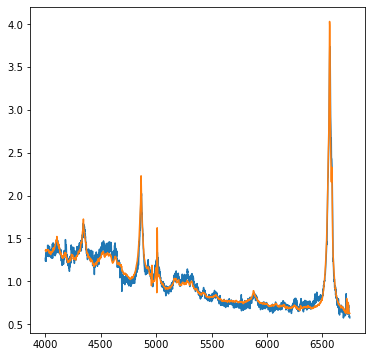

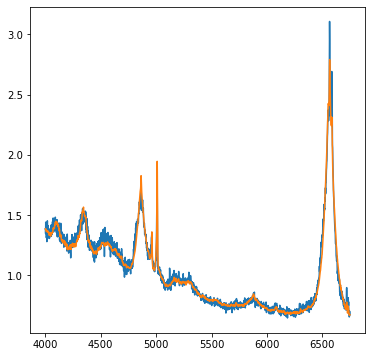

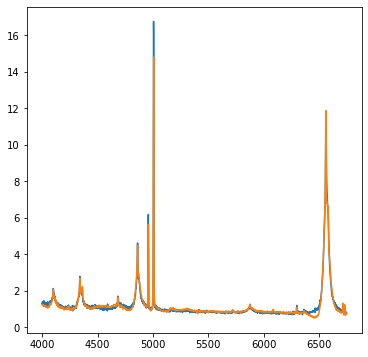

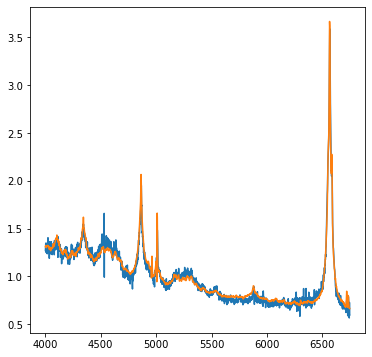

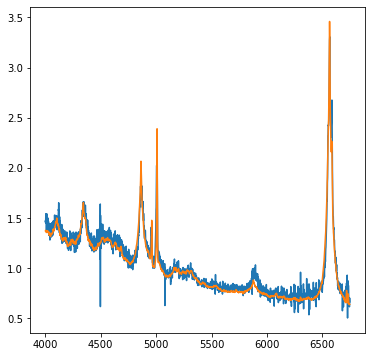

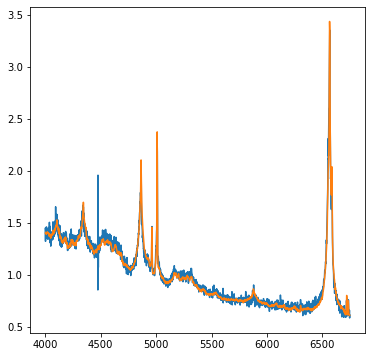

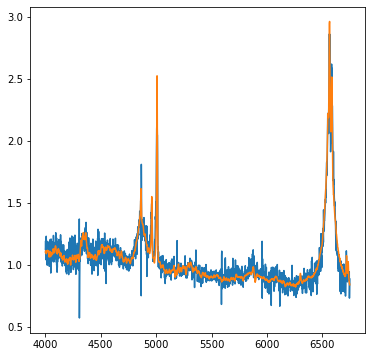

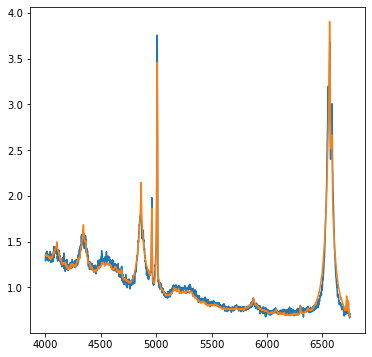

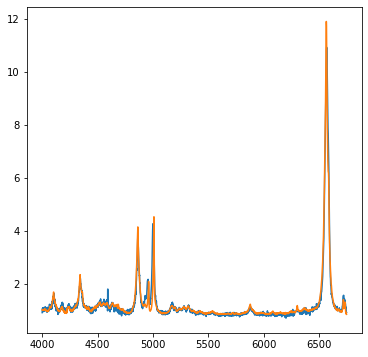

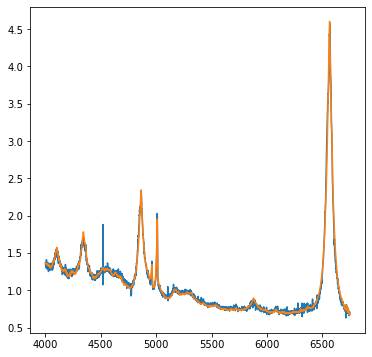

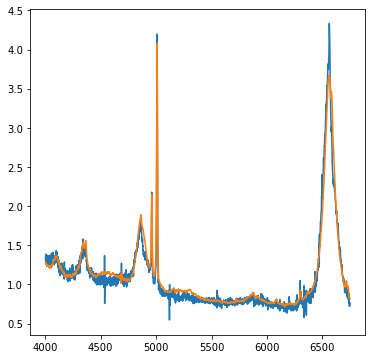

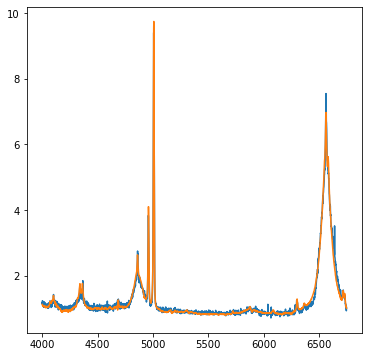

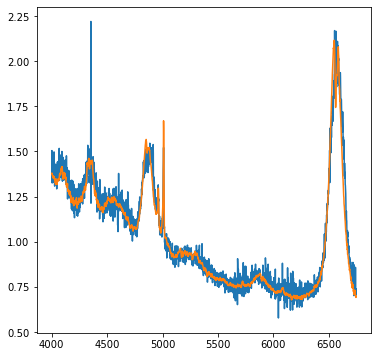

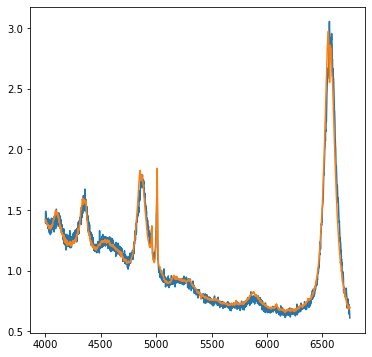

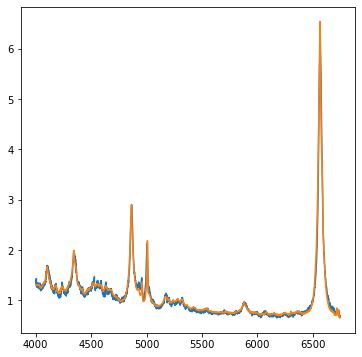

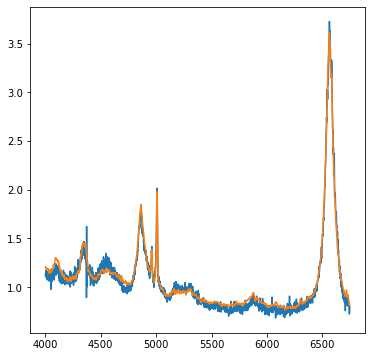

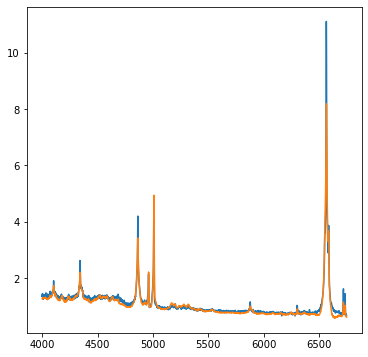

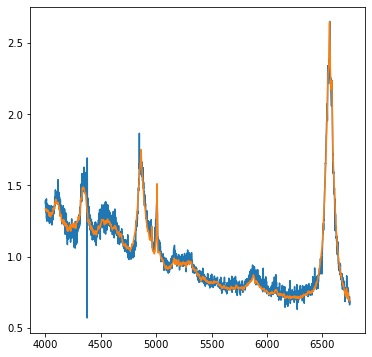

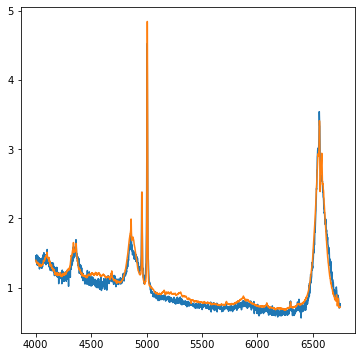

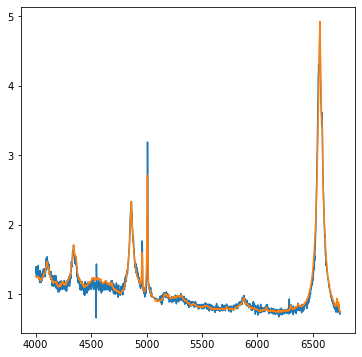

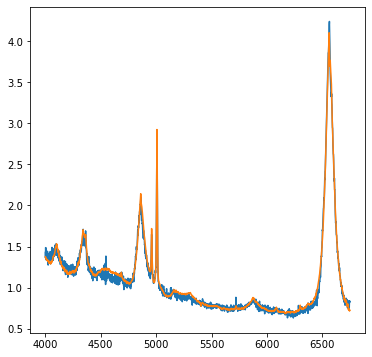

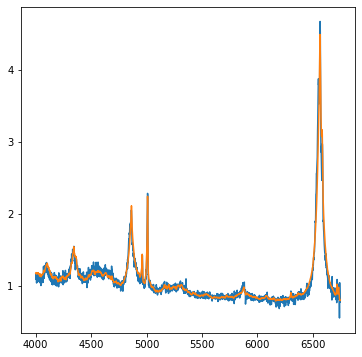

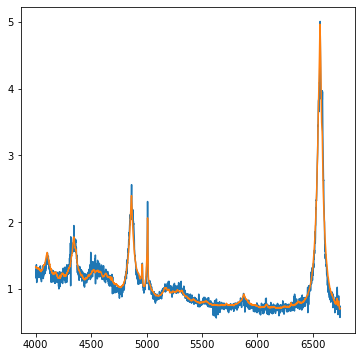

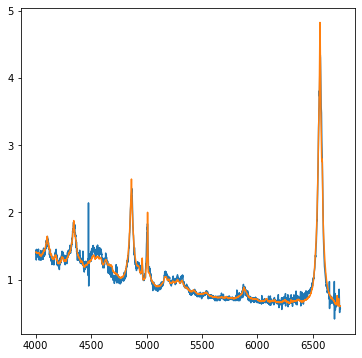

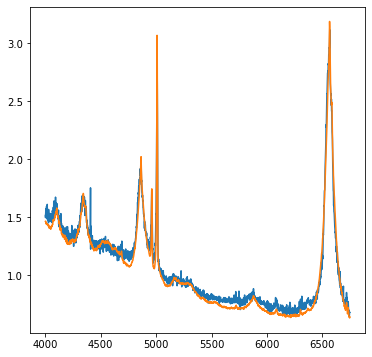

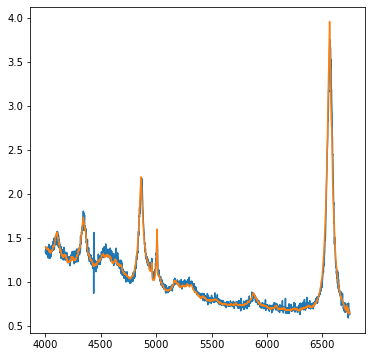

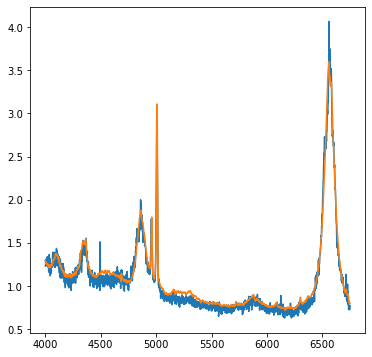

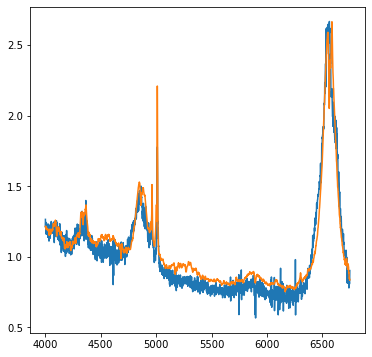

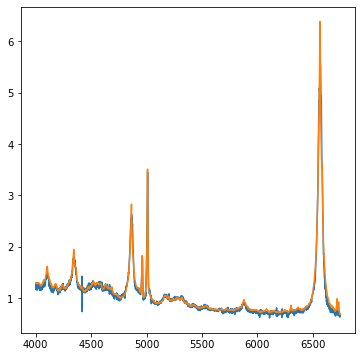

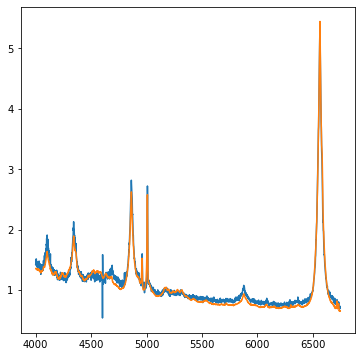

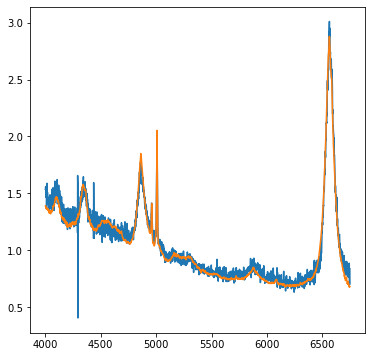

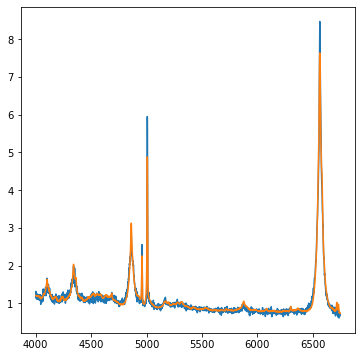

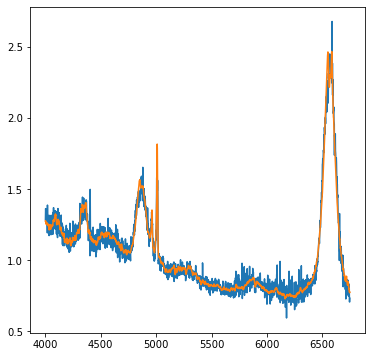

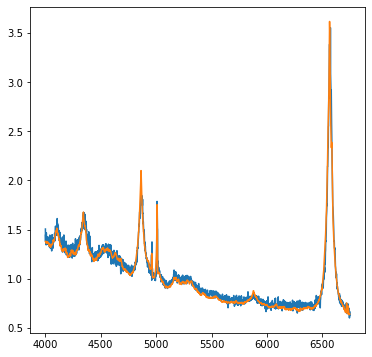

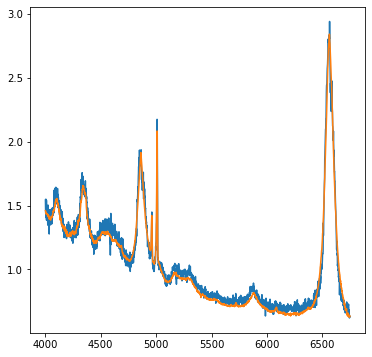

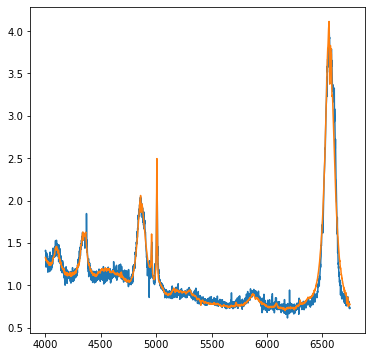

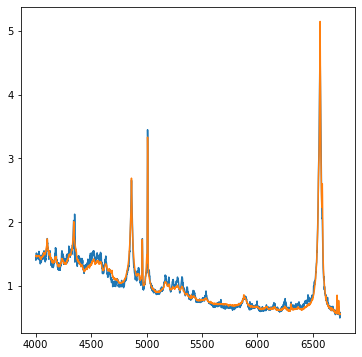

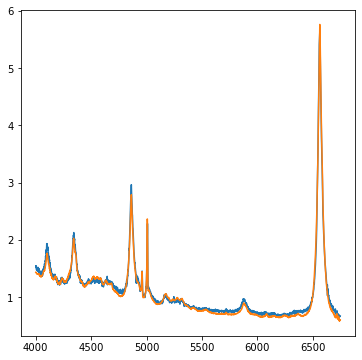

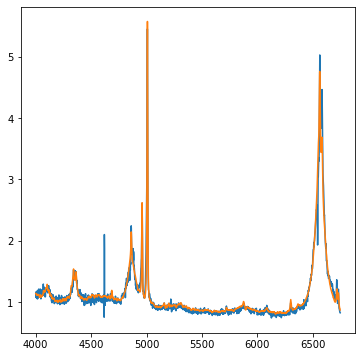

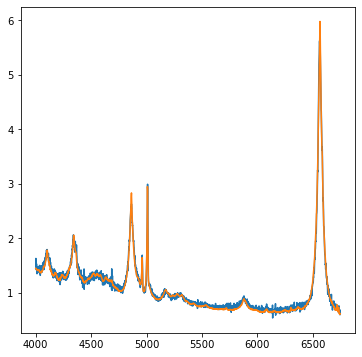

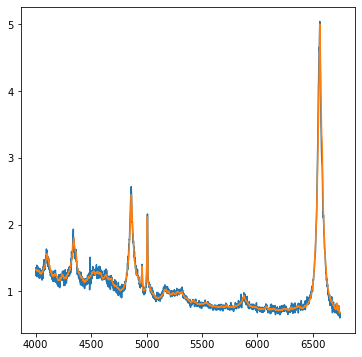

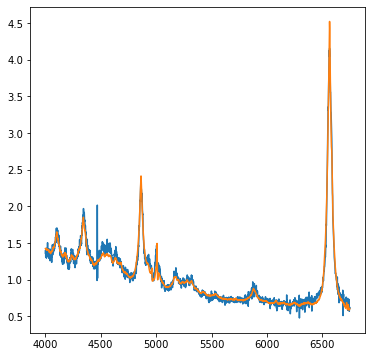

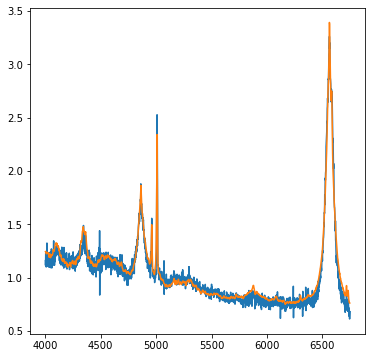

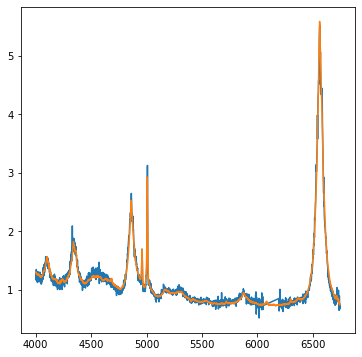

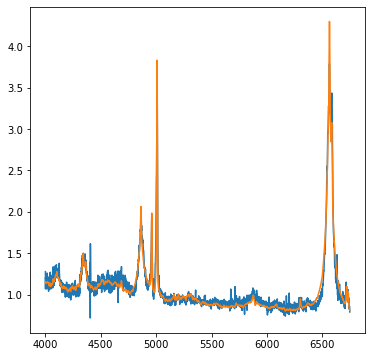

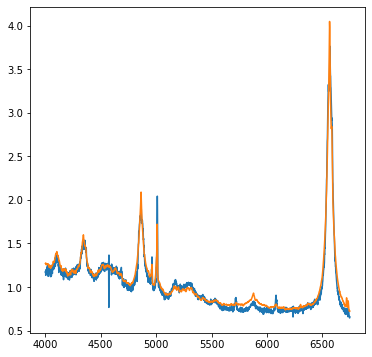

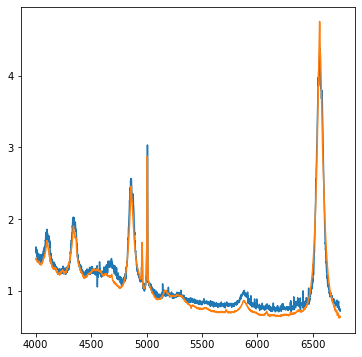

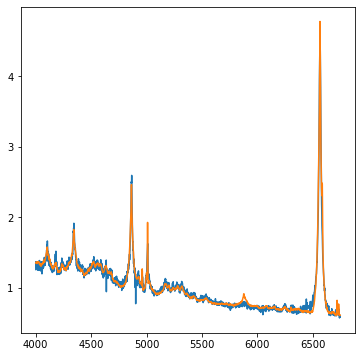

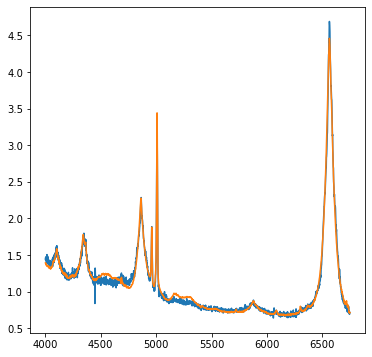

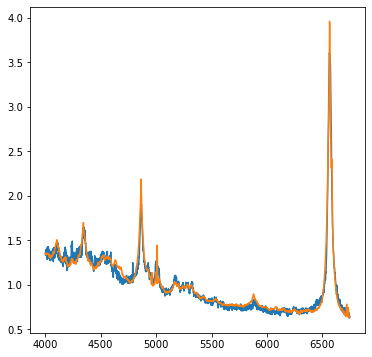

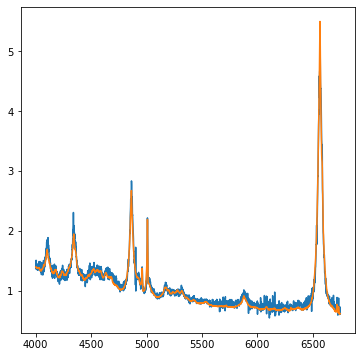

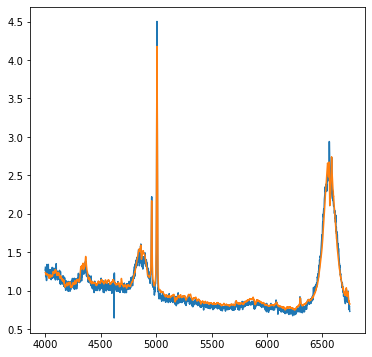

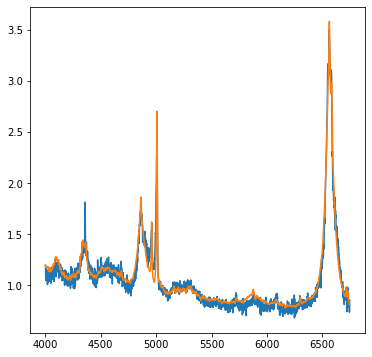

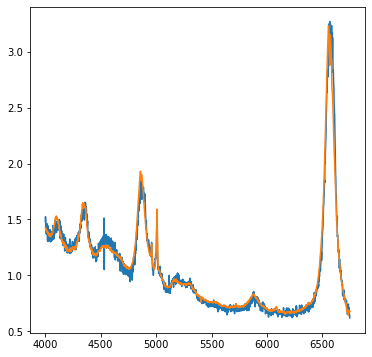

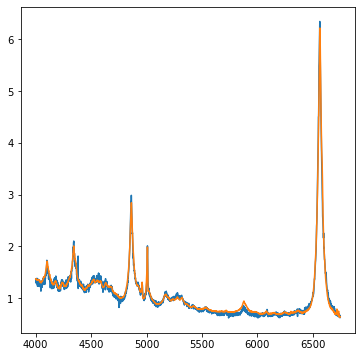

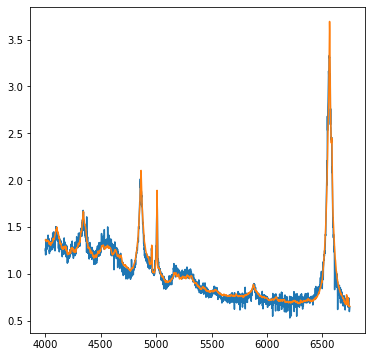

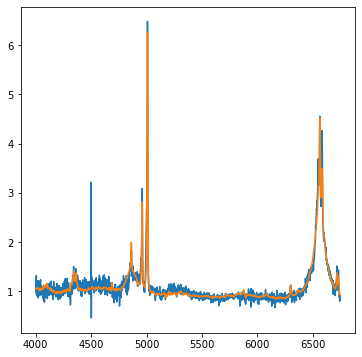

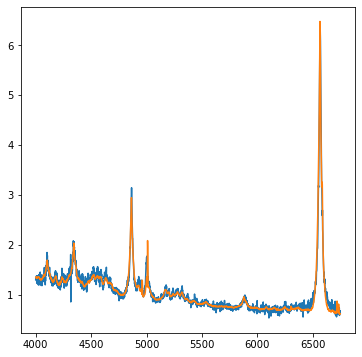

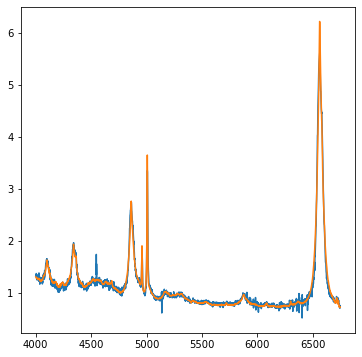

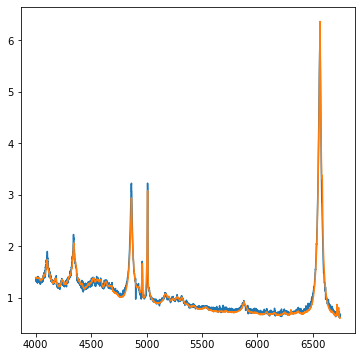

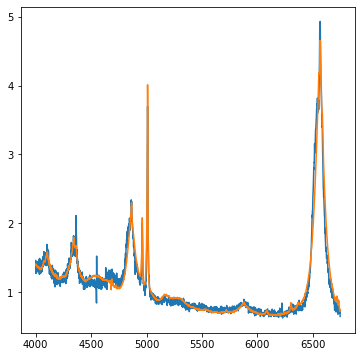

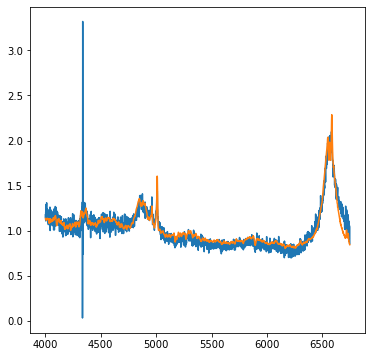

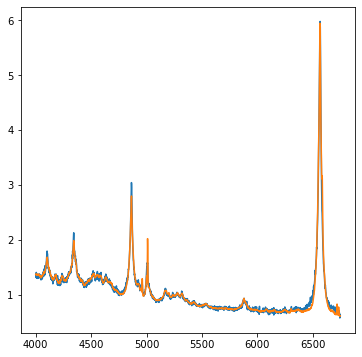

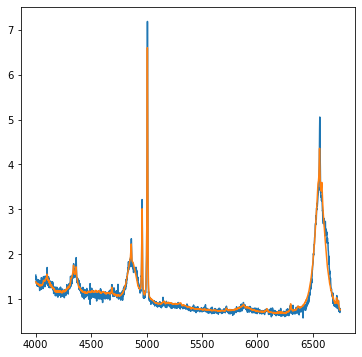

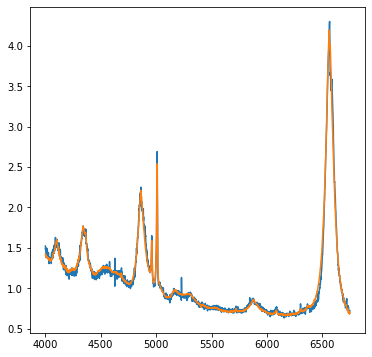

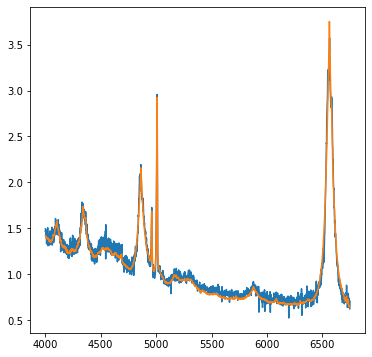

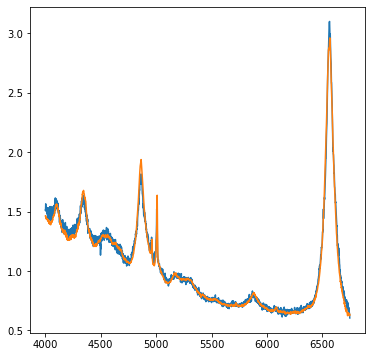

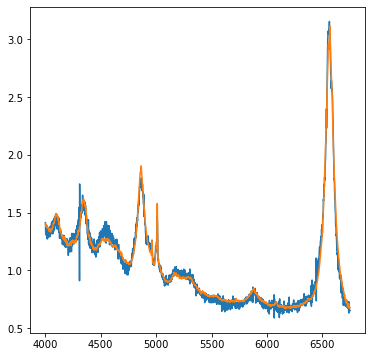

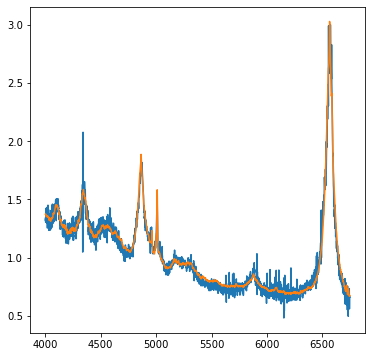

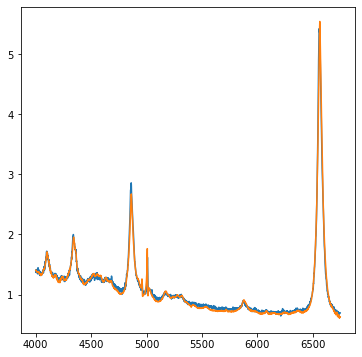

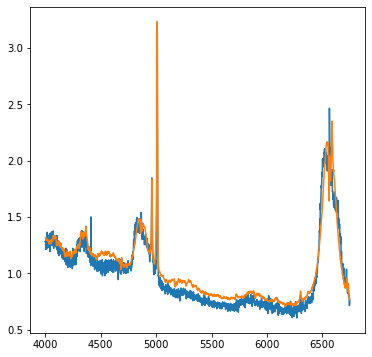

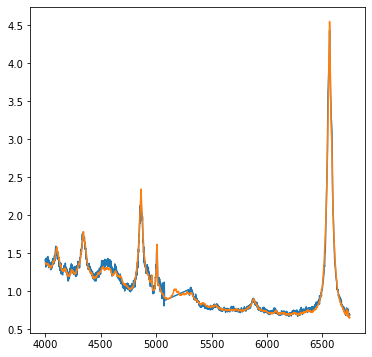

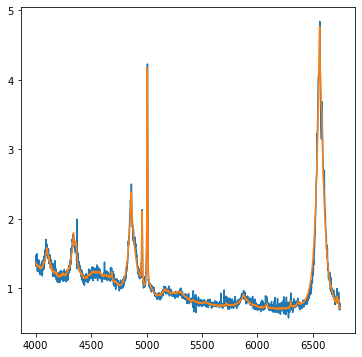

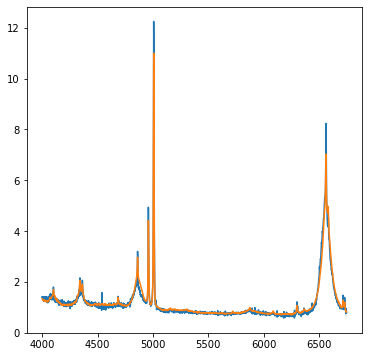

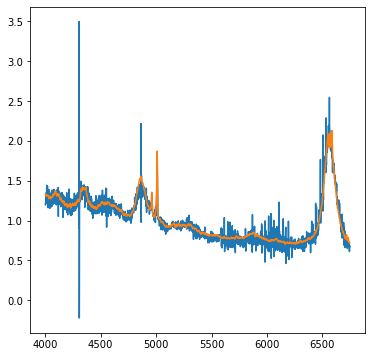

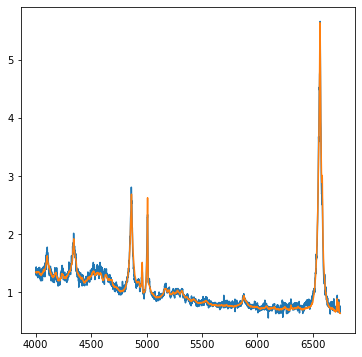

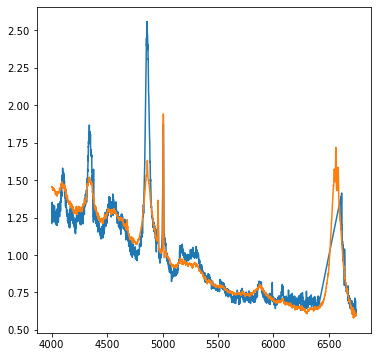

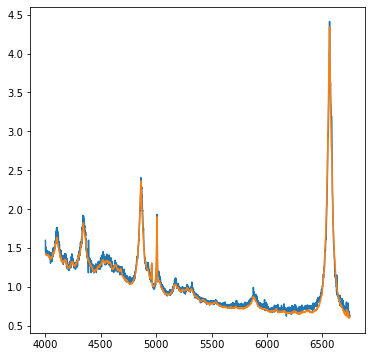

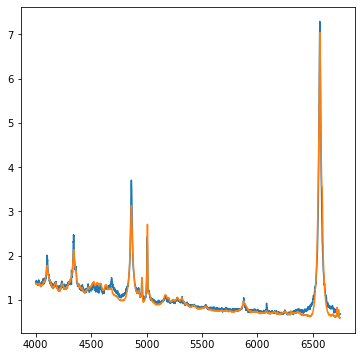

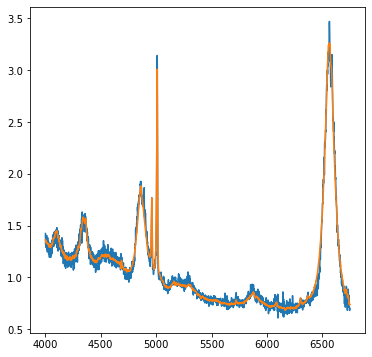

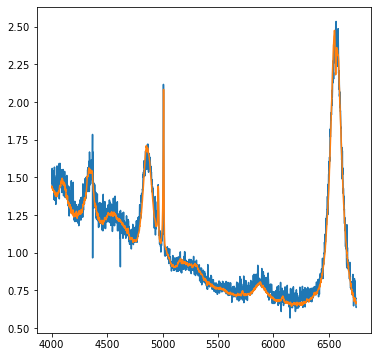

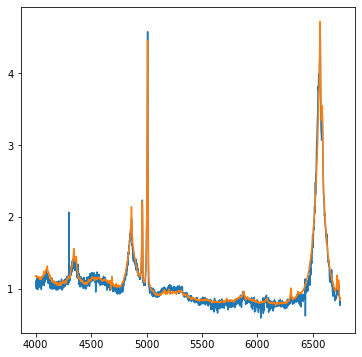

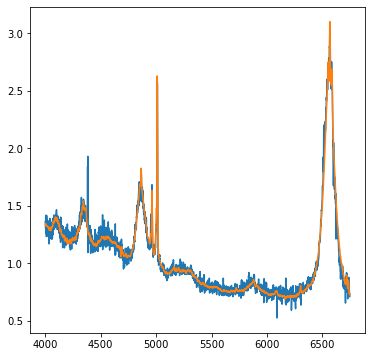

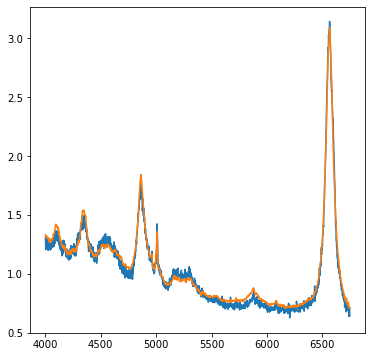

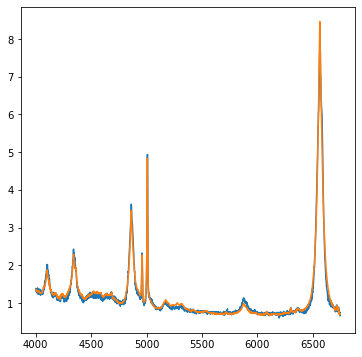

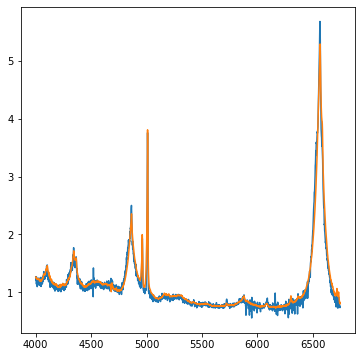

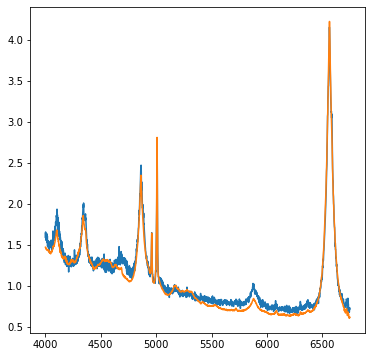

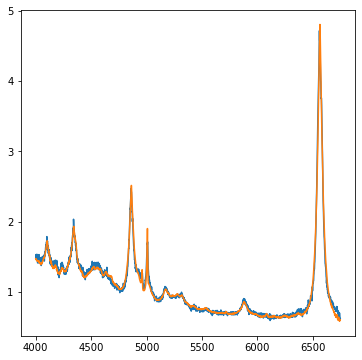

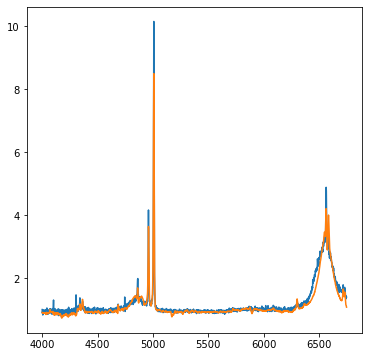

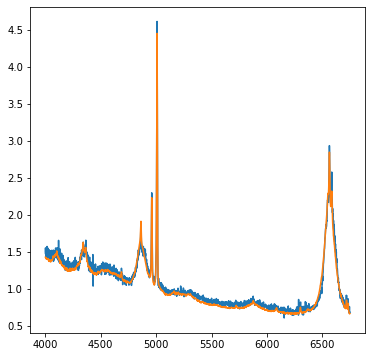

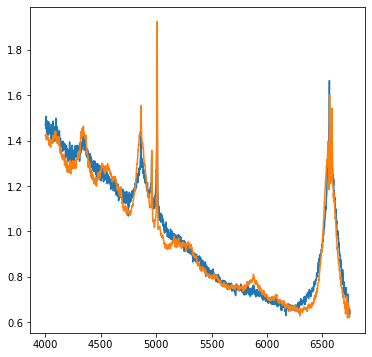

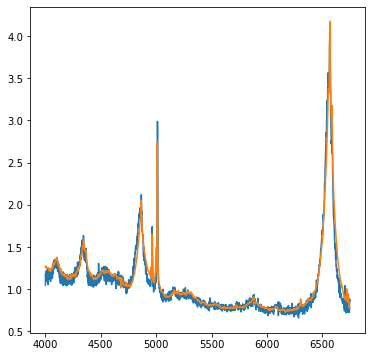

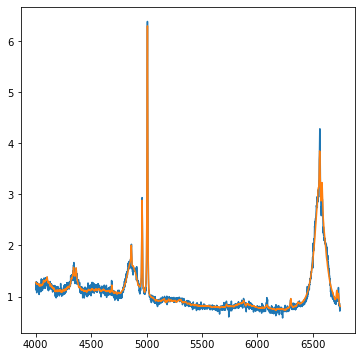

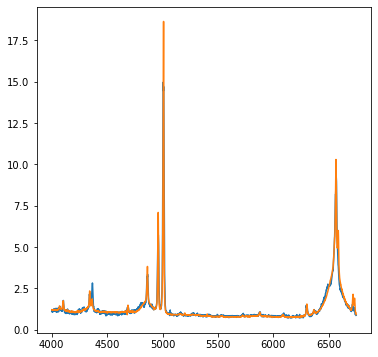

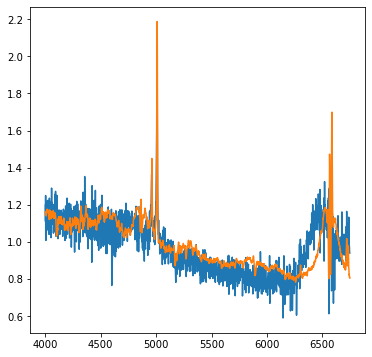

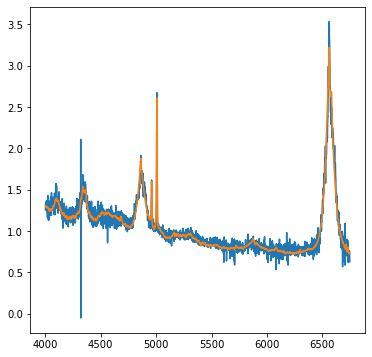

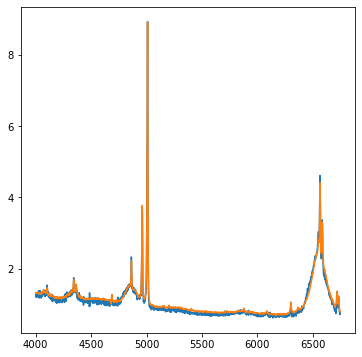

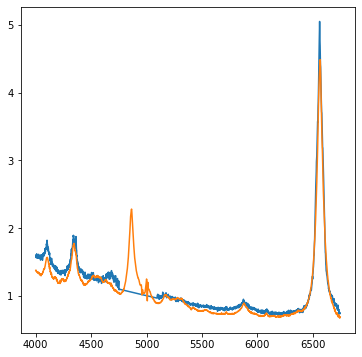

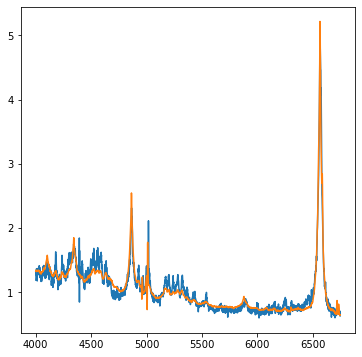

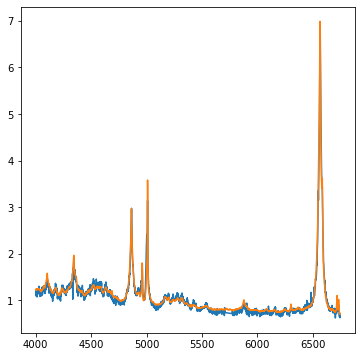

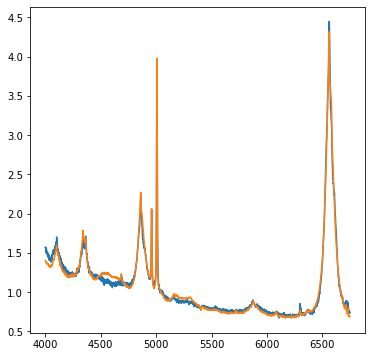

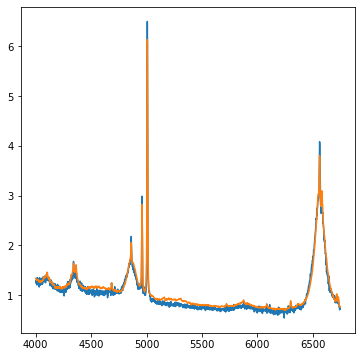

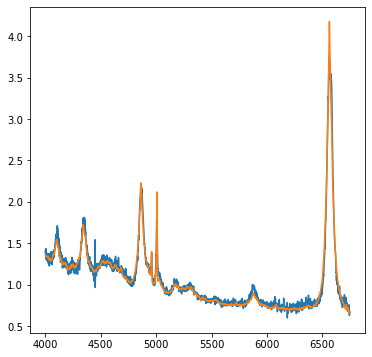

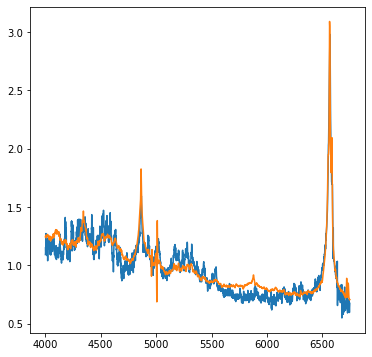

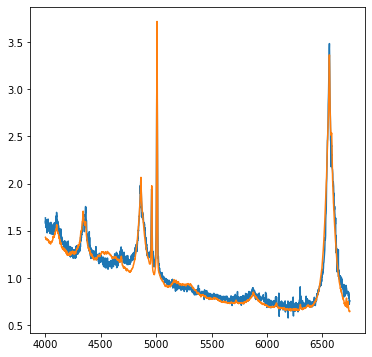

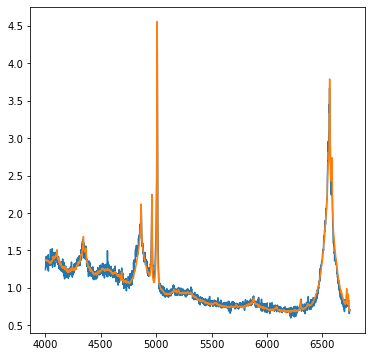

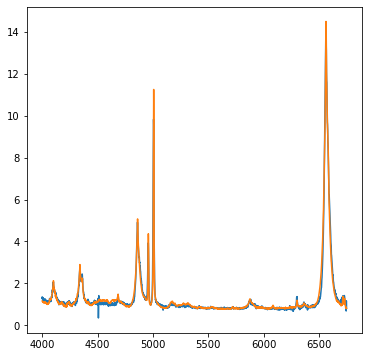

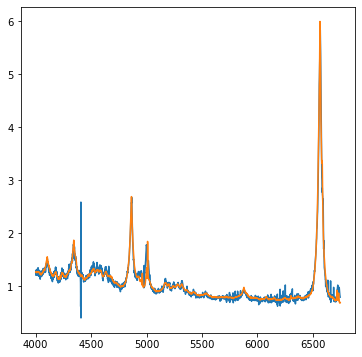

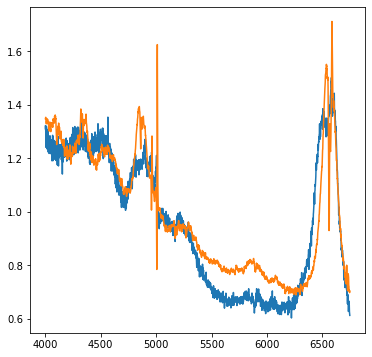

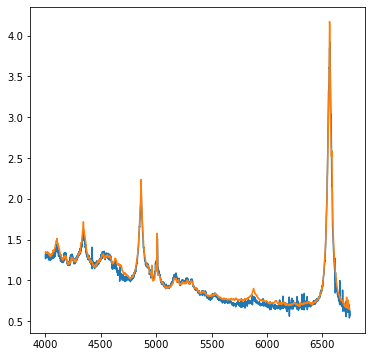

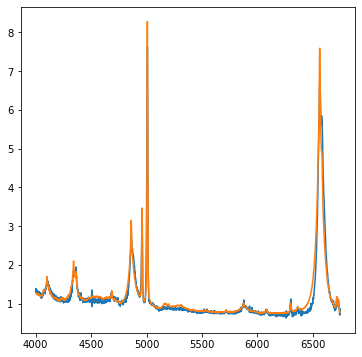

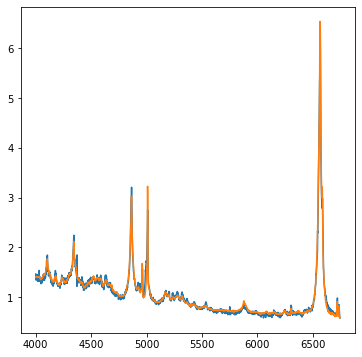

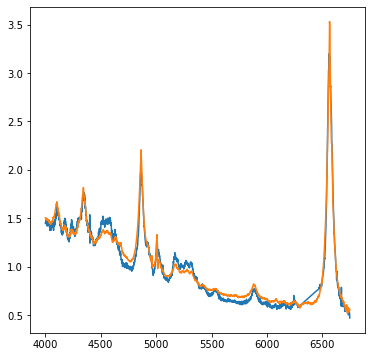

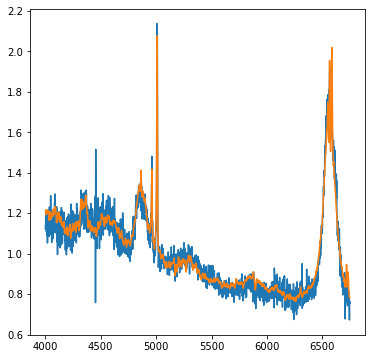

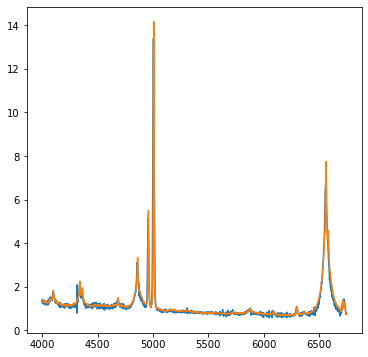

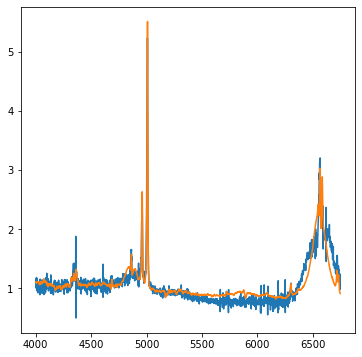

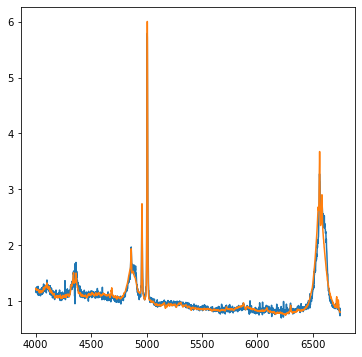

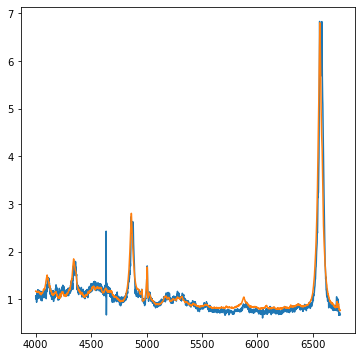

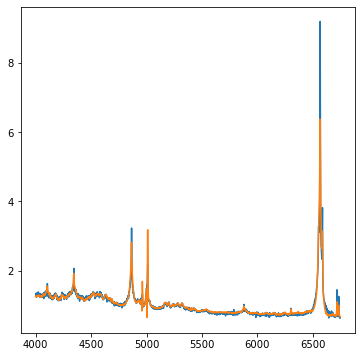

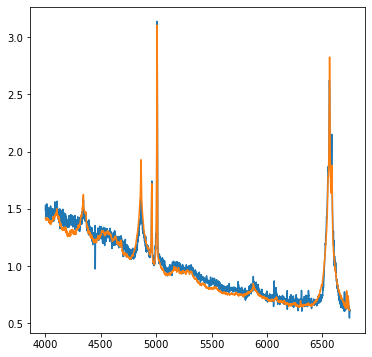

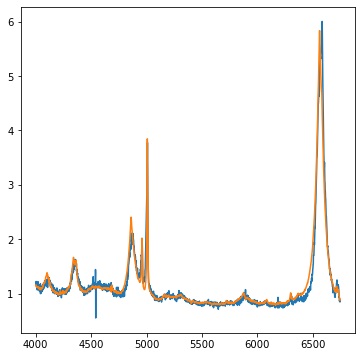

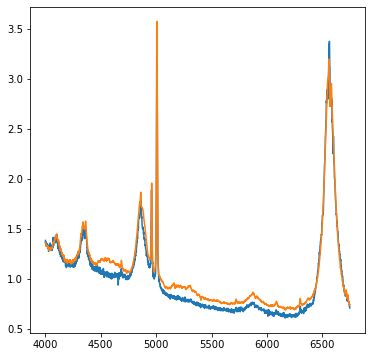

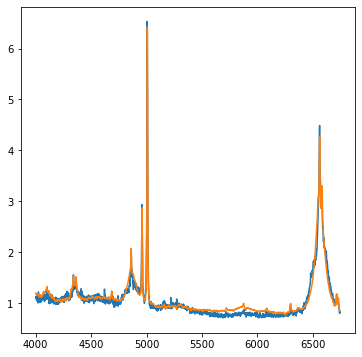

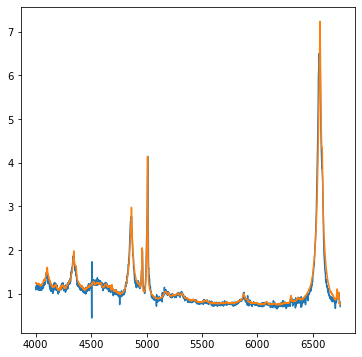

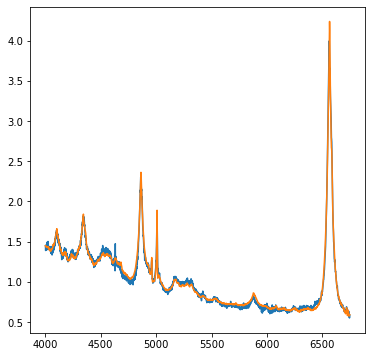

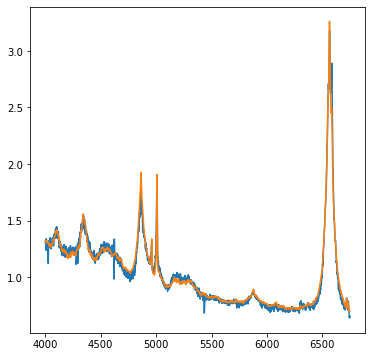

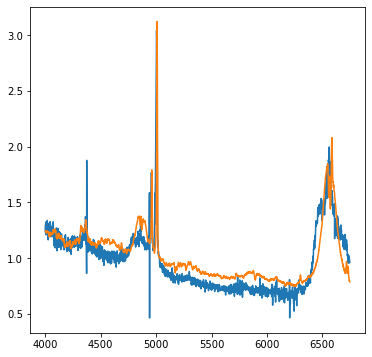

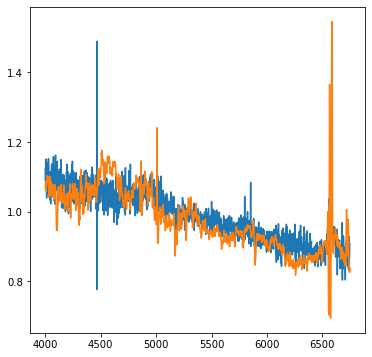

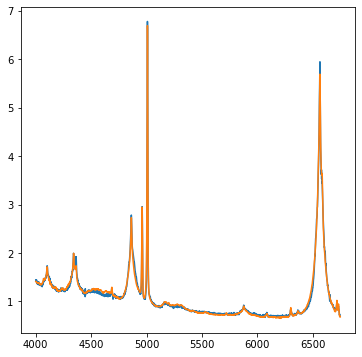

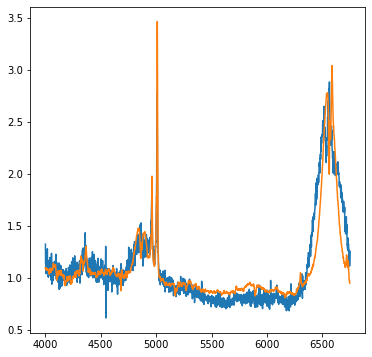

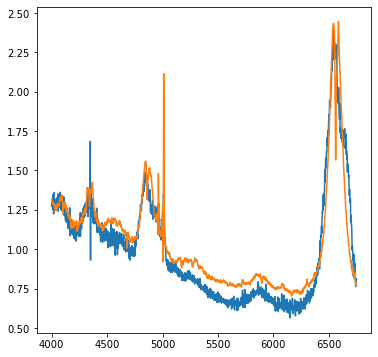

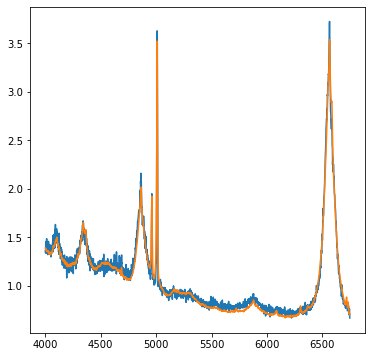

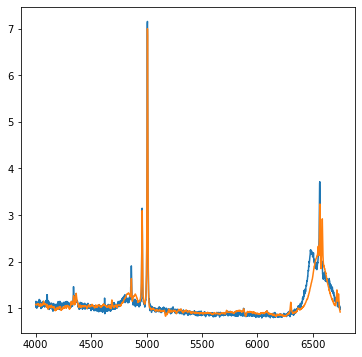

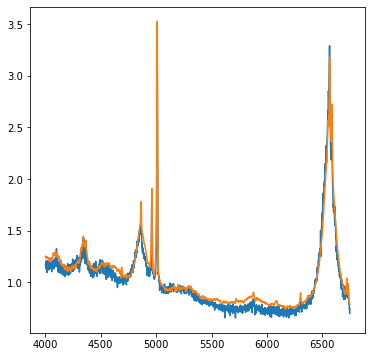

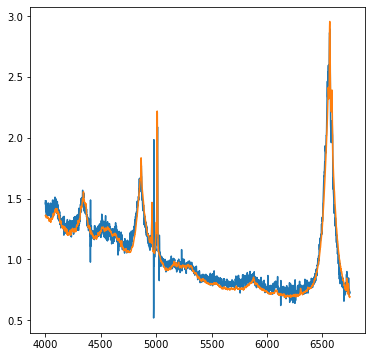

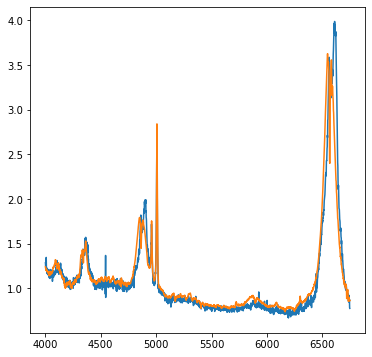

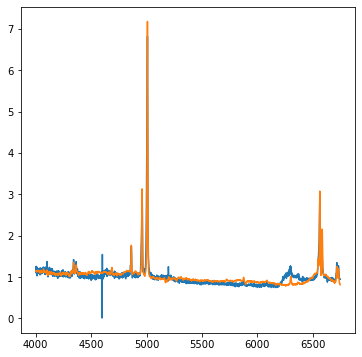

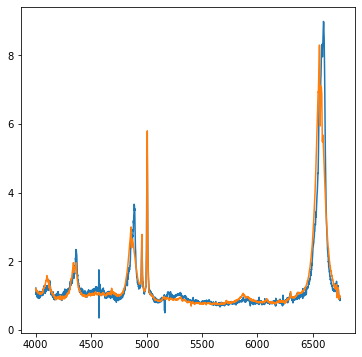

In [45]:
for i in range(len(rqqs)):
    fig = plt.figure(figsize=(6,6))
    plt.plot(wave[0], rqqs[i,:])
    plt.plot(wave[0], mean+np.dot(eigvals_rqqs[i,:], eigenvectors))
    plt.show()

In [46]:
# t-SNE
from sklearn.manifold import TSNE
#Not sure what learning_rate does
#tsne2 = TSNE(n_components = 2, learning_rate=100)
tsne2 = TSNE(n_components = 2)
projTSNE2 = tsne2.fit_transform(eigvals_rqqs)
#np.save("tSNE2_Hewett2017.npy", projTSNE2)

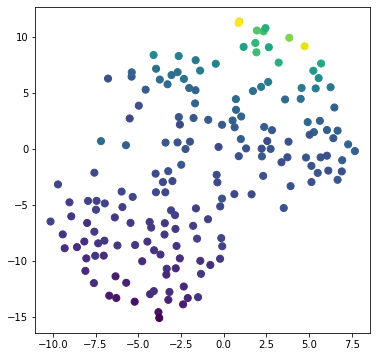

In [49]:
fig = plt.figure(figsize=(6,6))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], s=50, c=eigvals_rqqs[:,0])
plt.show()

---

Now reconstruct *our spectra* based on this model.

In [50]:
dat.sort_values("A_morph")

A_morph           SDSS_NAME          RA        DEC  REDSHIFT  PLATE  \
0         D  093509.48+481910.2  143.789520  48.319504    0.2238    834   
1         E  152925.98+021646.6  232.358261   2.279618    0.2634   2954   
2         E  144414.66+063306.7  221.061111   6.551877    0.2080   1829   
3         E  140808.19+430316.5  212.034164  43.054600    0.2581   1467   
4         E  172711.80+632242.1  261.799194  63.378372    0.2174    352   
..      ...                 ...         ...        ...       ...    ...   
173     NaN  092837.98+602521.0  142.158264  60.422504    0.2954    485   
174     NaN  093200.07+553347.4  143.000336  55.563171    0.2656    556   
175     NaN  093653.84+533126.8  144.224350  53.524124    0.2281    768   
176     NaN  094215.12+090015.8  145.563034   9.004406    0.2127   1305   
177     NaN  094603.94+013923.6  146.516434   1.656574    0.2203    480   

     FIBER    MJD  TARGET_FLAG_TARGET  NSPECOBS  ...    f_c   logL     i_2  \
0      361  52316                7691         1  ...  1.000  22.92  17.026   
1      379  54561                   3         1  ...  1.000  22.47  17.490   
2      464  53494           135273475         1  ...  1.000  22.47  16.552   
3       48  53115                7171         1  ...  1.000  22.99  16.922   
4      639  51789                7168         2  ...  1.000  22.97  16.730   
..     ...    ...                 ...       ...  ...    ...    ...     ...   
173    506  51909                7173         1  ...  0.104  25.34  17.000   
174    295  51991             2104853         1  ...  1.000  24.01  17.312   
175    473  52281             1048579         1  ...  1.000  22.13  16.465   
176    281  52757                   2         1  ...  1.000  23.15  16.788   
177    480  51989             2097173         1  ...  1.000  23.51  16.373   

      I_2a       R         LD_cm       Lobs   L_1.4GHz  SFR (Msun/yr)  \
0   -22.73    1.07  3.434469e+27  22.949804  23.453667     167.694491   
1   -22.61    0.41  4.120027e+27  22.510854  23.024252      62.388456   
2   -23.04    0.29  3.160119e+27  22.505157  23.005020      59.685944   
3   -23.14    0.85  4.030828e+27  23.028500  23.540693     204.901363   
4   -22.95    0.99  3.313937e+27  23.002030  23.504149     188.365559   
..     ...     ...           ...        ...        ...            ...   
173 -23.35  148.84  4.699743e+27  25.376085  25.897091   46552.449334   
174 -22.81   11.94  4.173728e+27  24.052318  24.566438    2174.153289   
175 -23.32    0.10  3.503693e+27  22.165986  22.670841      27.649846   
176 -22.85    1.66  3.245413e+27  23.186956  23.688075     287.691340   
177 -23.34    2.41  3.365498e+27  23.546181  24.049049     660.543632   

     Separation  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
173         NaN  
174         NaN  
175         NaN  
176         NaN  
177         NaN  

[178 rows x 163 columns]

In [51]:
sdss_name = dat["SDSS_NAME"].values
z         = dat["REDSHIFT"].values
plate     = dat["PLATE"].values
mjd       = dat["MJD"].values
fiber     = dat["FIBER"].values
A_morph = {
    "RL": isNaN(dat["A_morph"].values),
    "U": dat["A_morph"].values=="U",
    "D": dat["A_morph"].values=="D",
    "E": dat["A_morph"].values=="E",
    "M": dat["A_morph"].values=="M",
    "SR":dat["A_morph"].values=="SR",
    "ND":dat["A_morph"].values=="ND"
}

In [52]:
def plot_params(param1, param2):
    fig = plt.figure(figsize=(7,7))
    plt.scatter(eigvals_rqqs[A_morph["U"],param1-1], eigvals_rqqs[A_morph["U"],param2-1], label="U")
    plt.scatter(eigvals_rqqs[A_morph["ND"],param1-1], eigvals_rqqs[A_morph["ND"],param2-1], label="ND")
    #plt.scatter(eigvals_rqqs[A_morph["SR"],param1-1], eigvals_rqqs[A_morph["SR"],param2-1], label="SR")
    plt.scatter(eigvals_rqqs[A_morph["D"],param1-1], eigvals_rqqs[A_morph["D"],param2-1], label="D")
    plt.scatter(eigvals_rqqs[A_morph["E"],param1-1], eigvals_rqqs[A_morph["E"],param2-1], label="E")
    plt.scatter(eigvals_rqqs[A_morph["M"],param1-1], eigvals_rqqs[A_morph["M"],param2-1], label="M")
    plt.scatter(eigvals_rqqs[A_morph["RL"],param1-1], eigvals_rqqs[A_morph["RL"],param2-1], color="pink", label="RL")
    plt.xlabel("Latent Param %d"%param1)
    plt.ylabel("Latent Param %d"%param2)
    plt.legend(loc="best")
    plt.show()

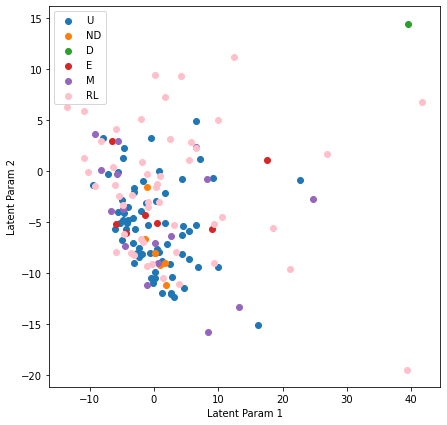

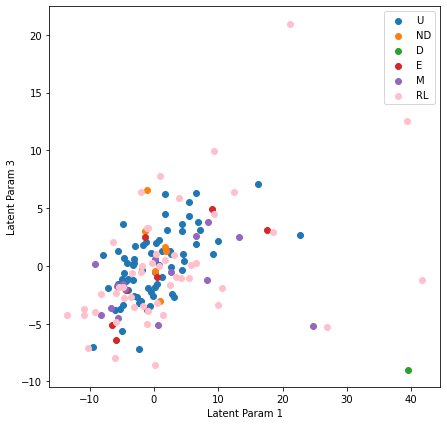

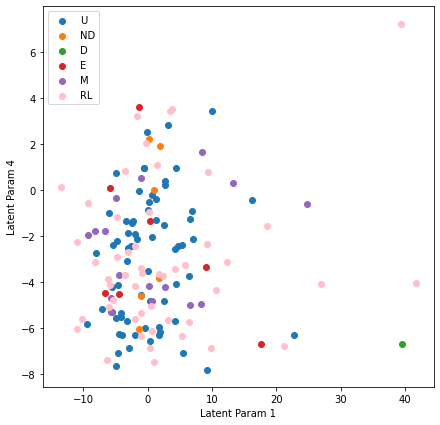

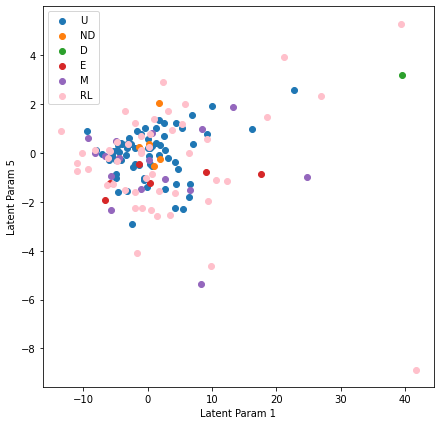

In [54]:
plot_params(1,2)
plot_params(1,3)
plot_params(1,4)
plot_params(1,5)
#plot_params(1,6)

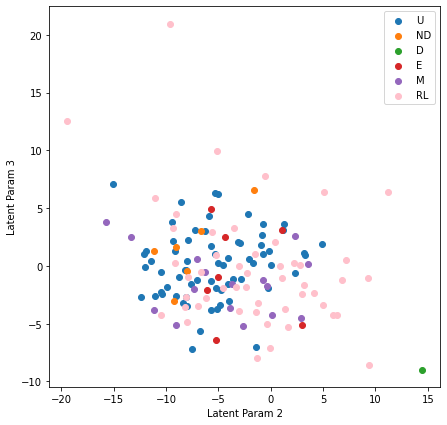

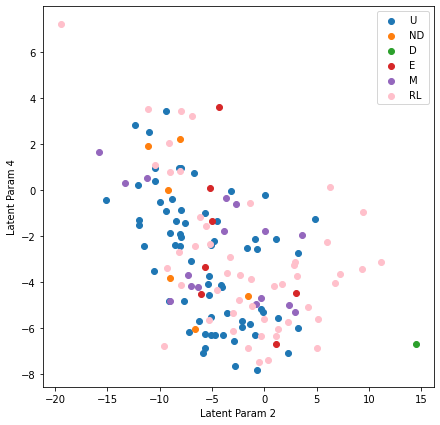

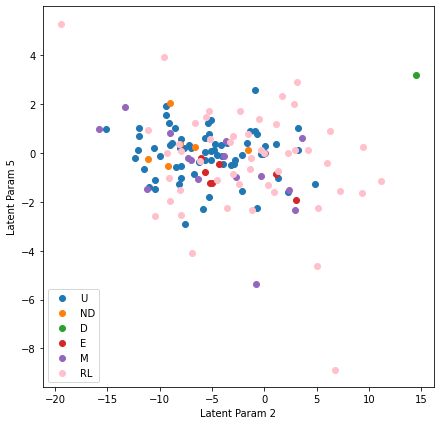

In [55]:
plot_params(2,3)
plot_params(2,4)
plot_params(2,5)
#plot_params(2,6)

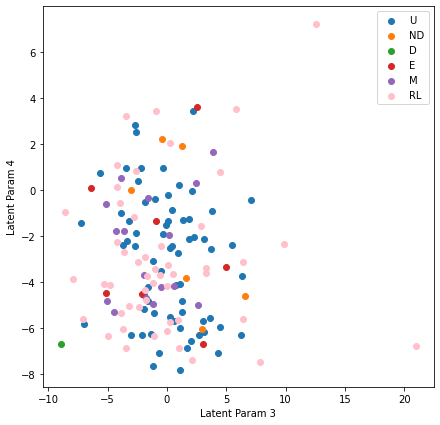

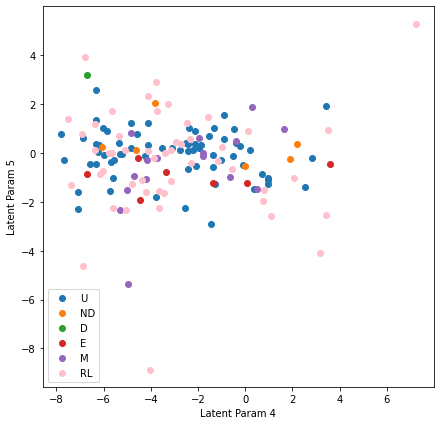

In [56]:
plot_params(3, 4)
plot_params(4,5)

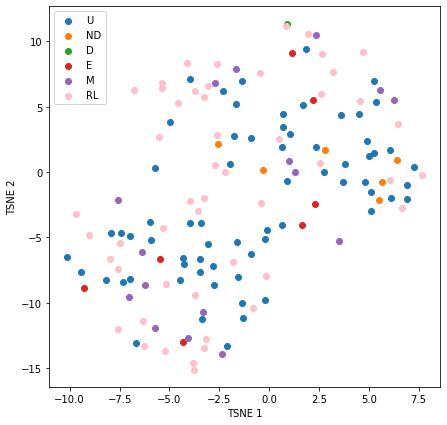

In [57]:
fig = plt.figure(figsize=(7,7))
plt.scatter(projTSNE2[A_morph["U"],0], projTSNE2[A_morph["U"],1], label="U")
plt.scatter(projTSNE2[A_morph["ND"],0], projTSNE2[A_morph["ND"],1], label="ND")
#plt.scatter(projTSNE2[A_morph["SR"],0], projTSNE2[A_morph["SR"],1], label="SR")
plt.scatter(projTSNE2[A_morph["D"],0], projTSNE2[A_morph["D"],1], label="D")
plt.scatter(projTSNE2[A_morph["E"],0], projTSNE2[A_morph["E"],1], label="E")
plt.scatter(projTSNE2[A_morph["M"],0], projTSNE2[A_morph["M"],1], label="M")
plt.scatter(projTSNE2[A_morph["RL"],0], projTSNE2[A_morph["RL"],1], color="pink", label="RL")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.legend(loc="best")
plt.show()